<html>
<body>
<h1>Series de tiempo del cuerpo de agua: Río Metztitlán</h1>
<ul>
  <li>Dra. Melanie Kolb</li>
  <li>M. en F. C. Gustavo Magallanes-Guijón</li>
  <li>Dr. Oliver López-Corona</li>
</ul> 
</body>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
from matplotlib.pylab import rcParams
%matplotlib inline
#from matplotlib import pyplot as plt
#import seaborn as sns

In [2]:
df_res_2018 = pd.read_excel('data/ResultadosCalidadDeAgua2012-2018.xlsx',
                    sheet_name='Resultados-calidad de agua 2012',na_values="...")
df_eti = pd.read_excel('data/ResultadosCalidadDeAgua2012-2018.xlsx',
                    sheet_name='Etiquetas',na_values="...")
df_sit = pd.read_excel('data/ResultadosCalidadDeAgua2012-2018.xlsx',
                    sheet_name='Sitios',na_values="...")
df_res_2019 = pd.read_excel('data/Resultados de Calidad del Agua 2019.xlsx',
                    sheet_name='Resultados 2019',na_values="...")

In [86]:
df_res_full = pd.concat([df_res_2018, df_res_2019], ignore_index=True, sort=False)

## Sitios que corresponden al mismo cuerpo de agua: Río Metztitlán

<html>
<body>
<p>Se tienen básicamente los siguientes tres sitios: </p>
<ol>
  <li>TLACOTEPEC</li>
  <li>LAGUNA DE METZTITLAN 1</li>
  <li>LAGUNA DE METZTITLAN 2</li>
</ol> 
<p>Abajo se presentan</p>

</body>
</html>

In [4]:
#df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN")
df_Metztitlan = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN", na=False)]
df_Metztitlan

,CLAVE SITIO,NOMBRE DEL SITIO,CUENCA,CLAVE ACUÍFERO,ACUÍFERO,ORGANISMO CUENCA,DIRECCIÓN LOCAL,ESTADO,MUNICIPIO,CUERPO DE AGUA,TIPO DE CUERPO DE AGUA,SUBTIPO CUERPO AGUA,LATITUD,LONGITUD
1451,DLHID1469,TLACOTEPEC,RÍO METZTITLÁN 2,NaN,NaN,GOLFO NORTE,HIDALGO,HIDALGO,METZTITLÁN,RIO METZTITLAN,LÓTICO,RÍO,20.650806,-98.82925
1490,DLHID1508,LAGUNA DE METZTITLAN 2,RÍO METZTITLÁN 2,NaN,NaN,GOLFO NORTE,HIDALGO,HIDALGO,METZTITLÁN,RIO METZTITLAN,LÉNTICO (HUMEDAL),LAGO,20.687570,-98.87022
1491,DLHID1509,LAGUNA DE METZTITLAN 1,RÍO METZTITLÁN 2,NaN,NaN,GOLFO NORTE,HIDALGO,HIDALGO,METZTITLÁN,RIO METZTITLAN,LÉNTICO (HUMEDAL),LAGO,20.681760,-98.86408


## Tenemos 22 variables relevantes según el documento 08_06_20_Base de datos CONAGUA.docx (página 12)

### Las variables son:

In [5]:
cols = ['SAAM','OD_mg/L','COLI_TOT','pH_CAMPO','TEMP_AGUA','NI_TOT','E_COLI','HG_TOT','PB_TOT',
        'CD_TOT','CR_TOT','AS_TOT','TURBIEDAD','SST','COLOR_VER','DUR_TOT','N_TOT','COLI_FEC',
        'PO4_TOT','N_NH3','N_NO2','N_NO3']
df_eti.loc[df_eti['CLAVE PARÁMETRO'].isin(cols)]

,CLAVE PARÁMETRO,NOMBRE DEL PARÁMETRO,UNIDAD MEDIDA
5,AS_TOT,Arsénico Total,mg/L
15,CD_TOT,Cadmio Total,mg/L
27,COLI_FEC,Coliformes Fecales,NMP/100 mL
28,COLI_TOT,Coliformes Totales,NMP/100 mL
29,COLOR_VER,Color Verdadero,U Pt/Co
36,CR_TOT,Cromo Total,mg/L
44,DUR_TOT,Dureza Total,mg CaCO3/L
45,E_COLI,Escherichia coli,NMP/100 mL
54,HG_TOT,Mercurio Total,mg/L
62,N_NH3,Nitrógeno Amoniacal,mg/L


In [6]:
#print("tenemos "+str(df_eti.loc[df_eti['CLAVE PARÁMETRO'].isin(cols)].shape[0])+" variables relevantes según el documento 08_06_20_Base de datos CONAGUA.docx página 12")

# De las variables relevantes calculamos aquellas que por lo menos tengan 10 datos

In [7]:
vartm10 = {}
df_nom_par_2018 = {}
df_nom_par_2019 = {}
for i in range (0,3):#index of sitios
    df_Metztitlan = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN", na=False)]
    nombre_sitio = df_Metztitlan["NOMBRE DEL SITIO"].array[i]
    index_namecols = df_Metztitlan.iloc[:,:]
    for j in range(len(cols)):#index of cols variable
        #for j in range(5,6):
            df_rows = df_eti[df_eti['CLAVE PARÁMETRO'] == cols[j]]
            titulo = df_rows['NOMBRE DEL PARÁMETRO']
            titulo = df_rows.iloc[0,1]        

            df_res_2018[cols[j]] = pd.to_numeric(df_res_2018[cols[j]], downcast="float",errors='coerce')
            df_res_2019[cols[j]] = pd.to_numeric(df_res_2019[cols[j]], downcast="float",errors='coerce')

            df_cuerpo_de_agua = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN", na=False)]        

            key_array_df = df_cuerpo_de_agua["CLAVE SITIO"].array[i]

            #Data 2012-2018
            serie_2018 = df_res_2018[df_res_2018["CLAVE SITIO"].str.contains(key_array_df, na=False)]
            serie_2018[cols[j]].replace('\< | \>', '')
            serie_2018[cols[j]].dropna()                

            #Data 2019
            serie_2019 = df_res_2019[df_res_2019["CLAVE SITIO"].str.contains(key_array_df, na=False)]
            serie_2019[cols[j]].replace('\< | \>', '')
            serie_2019[cols[j]].dropna()

            if ((serie_2018[cols[j]].dropna().shape[0]+serie_2019[cols[j]].dropna().shape[0])>=10):
                vartm10.setdefault(i, []).append(titulo)                
                df_nom_par_2018.setdefault(i, []).append(serie_2018[cols[j]].dropna())
                df_nom_par_2019.setdefault(i, []).append(serie_2019[cols[j]].dropna())

# TLACOTEPEC

In [8]:
print("Para el sitio TLACOTEPEC tenemos las " +str(len(vartm10[0]))+ " siguientes variables que tienen por los menos 10 datos:")

Para el sitio TLACOTEPEC tenemos las 19 siguientes variables que tienen por los menos 10 datos:


In [9]:
vartm10[0]

['Sustancias Activas al Azul de Metileno',
 'Oxígeno Disuelto',
 'Coliformes Totales',
 'Potencial de Hidrógeno',
 'Temperatura agua',
 'Níquel Total',
 'Escherichia coli',
 'Mercurio Total',
 'Cromo Total',
 'Arsénico Total',
 'Turbiedad',
 'Sólidos Suspendidos Totales',
 'Color Verdadero',
 'Dureza Total',
 'Nitrógeno Total (Cálculo)',
 'Coliformes Fecales',
 'Nitrógeno Amoniacal',
 'Nitrógeno de Nitritos',
 'Nitrógeno de Nitratos']

In [10]:
#for first site
df_mim_tlacotepec_2018 = pd.DataFrame.from_dict(df_nom_par_2018[0], orient='columns', dtype=None)
df_mim_tlacotepec_2019 = pd.DataFrame.from_dict(df_nom_par_2019[0], orient='columns', dtype=None)

In [11]:
tlacotepec_csv_2018 = df_mim_tlacotepec_2018.transpose()
tlacotepec_csv_2019 = df_mim_tlacotepec_2019.transpose()
#tlacotepec_csv.columns
#tlacotepec_csv[tlacotepec_csv.columns[0]]

In [12]:
tlacotepec_csv_2018.to_csv('data/tlacotepec_2018_mim.csv',index=False)
tlacotepec_csv_2019.to_csv('data/tlacotepec_2019_mim.csv',index=False)

In [13]:
!tail -1 data/tlacotepec_2019_mim.csv >> data/tlacotepec_2018_mim.csv

In [14]:
tlacotepec = pd.read_csv("data/tlacotepec_2018_mim.csv", na_values=None)

In [15]:
#tlacotepec

In [16]:
#tlacotepec = tlacotepec.fillna(0)
tlacotepec = tlacotepec.interpolate(method='linear', axis=0, limit_direction='both', limit=8)


### Función para normalizar

In [17]:
def normalize(df):
       result = df.copy()
       for feature_name in df.columns:
           max_value = df[feature_name].max()
           min_value = df[feature_name].min()
           result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
       return result

In [18]:
tlacotepec = normalize(tlacotepec)
tlacotepec.to_csv('data/tlacotepec_mim.csv',index=False)

# LAGUNA DE METZTITLAN 2

In [19]:
print("Para el sitio LAGUNA DE METZTITLAN 2 tenemos las " +str(len(vartm10[1]))+ " siguientes variables que tienen por los menos 10 datos:")

Para el sitio LAGUNA DE METZTITLAN 2 tenemos las 10 siguientes variables que tienen por los menos 10 datos:


In [20]:
vartm10[1]

['Mercurio Total',
 'Turbiedad',
 'Sólidos Suspendidos Totales',
 'Color Verdadero',
 'Dureza Total',
 'Nitrógeno Total (Cálculo)',
 'Coliformes Fecales',
 'Nitrógeno Amoniacal',
 'Nitrógeno de Nitritos',
 'Nitrógeno de Nitratos']

In [21]:
df_mim_metztitlan_2_2018 = pd.DataFrame.from_dict(df_nom_par_2018[1], orient='columns', dtype=None)
df_mim_metztitlan_2_2019 = pd.DataFrame.from_dict(df_nom_par_2019[1], orient='columns', dtype=None)

In [22]:
metztitlan_2_csv_2018 = df_mim_metztitlan_2_2018.transpose()
metztitlan_2_csv_2019 = df_mim_metztitlan_2_2019.transpose()

In [23]:
metztitlan_2_csv_2018.to_csv('data/metztitlan_2_2018_mim.csv',index=False)
metztitlan_2_csv_2019.to_csv('data/metztitlan_2_2019_mim.csv',index=False)

In [24]:
!tail -1 data/metztitlan_2_2019_mim.csv >> data/metztitlan_2_2018_mim.csv

In [25]:
metztitlan_2 = pd.read_csv("data/metztitlan_2_2018_mim.csv", na_values=None)

In [26]:
metztitlan_2 = metztitlan_2.interpolate(method='linear', axis=0, limit_direction='both', limit=8)

In [27]:
#metztitlan_2.fillna(0)
metztitlan_2 = normalize(metztitlan_2)
metztitlan_2.to_csv('data/metztitlan_2_mim.csv',index=False)

# LAGUNA DE METZTITLAN 1

In [28]:
print("Para el sitio LAGUNA DE METZTITLAN 1 tenemos las " +str(len(vartm10[2]))+ " siguientes variables que tienen por los menos 10 datos:")

Para el sitio LAGUNA DE METZTITLAN 1 tenemos las 11 siguientes variables que tienen por los menos 10 datos:


In [29]:
vartm10[2]

['Escherichia coli',
 'Mercurio Total',
 'Turbiedad',
 'Sólidos Suspendidos Totales',
 'Color Verdadero',
 'Dureza Total',
 'Nitrógeno Total (Cálculo)',
 'Coliformes Fecales',
 'Nitrógeno Amoniacal',
 'Nitrógeno de Nitritos',
 'Nitrógeno de Nitratos']

In [30]:
df_mim_metztitlan_1_2018 = pd.DataFrame.from_dict(df_nom_par_2018[2], orient='columns', dtype=None)
df_mim_metztitlan_1_2019 = pd.DataFrame.from_dict(df_nom_par_2019[2], orient='columns', dtype=None)

In [31]:
metztitlan_1_csv_2018 = df_mim_metztitlan_1_2018.transpose()
metztitlan_1_csv_2019 = df_mim_metztitlan_1_2019.transpose()

In [32]:
metztitlan_1_csv_2018.to_csv('data/metztitlan_1_2018_mim.csv',index=False)
metztitlan_1_csv_2019.to_csv('data/metztitlan_1_2019_mim.csv',index=False)

In [33]:
!tail -1 data/metztitlan_1_2019_mim.csv >> data/metztitlan_1_2018_mim.csv

In [34]:
metztitlan_1 = pd.read_csv("data/metztitlan_1_2018_mim.csv", na_values=None)

In [35]:
metztitlan_1 = metztitlan_1.interpolate(method='linear', axis=0, limit_direction='both', limit=8)
metztitlan_1 = normalize(metztitlan_1)
metztitlan_1.to_csv('data/metztitlan_1_mim.csv',index=False)

# Intersección de las variables (de por lo menos 10 puntos de) los tres sitios

In [36]:
def common_ele(my_A, my_B, my_C):
   my_s1 = set(my_A)
   my_s2 = set(my_B)
   my_s3 = set(my_C)
   my_set1 = my_s1.intersection(my_s2)
   output_set = my_set1.intersection(my_s3)
   return output_set

In [37]:
print("La intersección de variables de los tres sitios es:")

La intersección de variables de los tres sitios es:


In [38]:
var_10 = common_ele(vartm10[0], vartm10[1], vartm10[2])

In [39]:
vartm10[0][0]

'Sustancias Activas al Azul de Metileno'

In [40]:
#print("tenemos "+str(df_eti.loc[df_eti['NOMBRE DEL PARÁMETRO'].isin(vartm10)].shape[0])+" variables relevantes que tienen más de 10 datos")

In [85]:
#df_eti.loc[df_eti['NOMBRE DEL PARÁMETRO'].isin(vartm10)]
df_res_full

,CLAVE SITIO,NOMBRE DEL SITIO,FECHA,ALC_FEN,ALC_TOT,CO3,HCO3,OH,CLOROF_A,COLI_FEC,...,TEMP_AGUA_31,TEMP_AGUA_32,TEMP_AGUA_33,TEMP_AGUA_34,TEMP_AGUA_35,TEMP_AGUA_36,TEMP_AGUA_37,TEMP_AGUA_38,TEMP_AGUA_39,TEMP_AGUA_39.5
0,DLAGU11,PRESA JOCOQUI 100M AGUAS ARRIBA DE LA CORTINA,2019-02-06,NaN,NaN,NaN,NaN,NaN,37.7164,NaN,...,12.5,12.5,12.4,12.2,12.0,11.6,11.4,11.2,NaN,NaN
1,DLAGU12,PRESA EL JOCOQUI COLA,2019-02-06,NaN,NaN,NaN,NaN,NaN,193.755,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DLAGU13,PRESA PRESIDENTE CALLES 100M AGUAS ARRIBA DE L...,2019-02-14,NaN,NaN,NaN,NaN,NaN,<0.1,20.0,...,11.0,10.9,10.8,10.8,10.7,10.7,10.6,10.6,NaN,NaN
3,DLAGU14,PRESA PRESIDENTE CALLES EMBARCADERO,2019-02-14,NaN,NaN,NaN,NaN,NaN,0.474,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DLAGU15,PRESA PRESIDENTE CALLES TECONGO,2019-02-14,NaN,NaN,NaN,NaN,NaN,<0.1,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9743,OCRBR5210M1,RIO BRAVO 8 (PASO DE LOS INDIOS),2019-03-15,NaN,NaN,NaN,NaN,NaN,NaN,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9744,OCRBR5708,EJIDO SECCION 22,2019-02-26,<25,241.08,0.0,241.08,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9745,OCRBR5709,EJIDO PALO BLANCO,2019-02-27,<25,317.52,0.0,317.52,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9746,OCRBR5710,EJIDO MESON DEL NORTE,2019-02-26,<25,200.9,0.0,200.90,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Gráficas de las variables de por lo menos 10 puntos

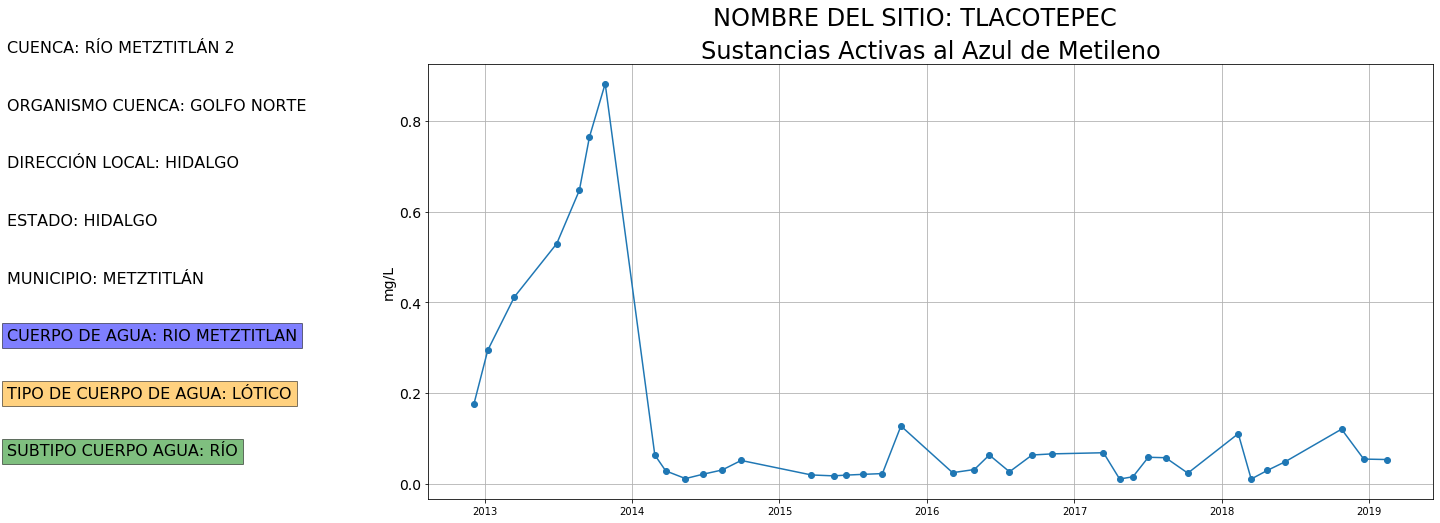

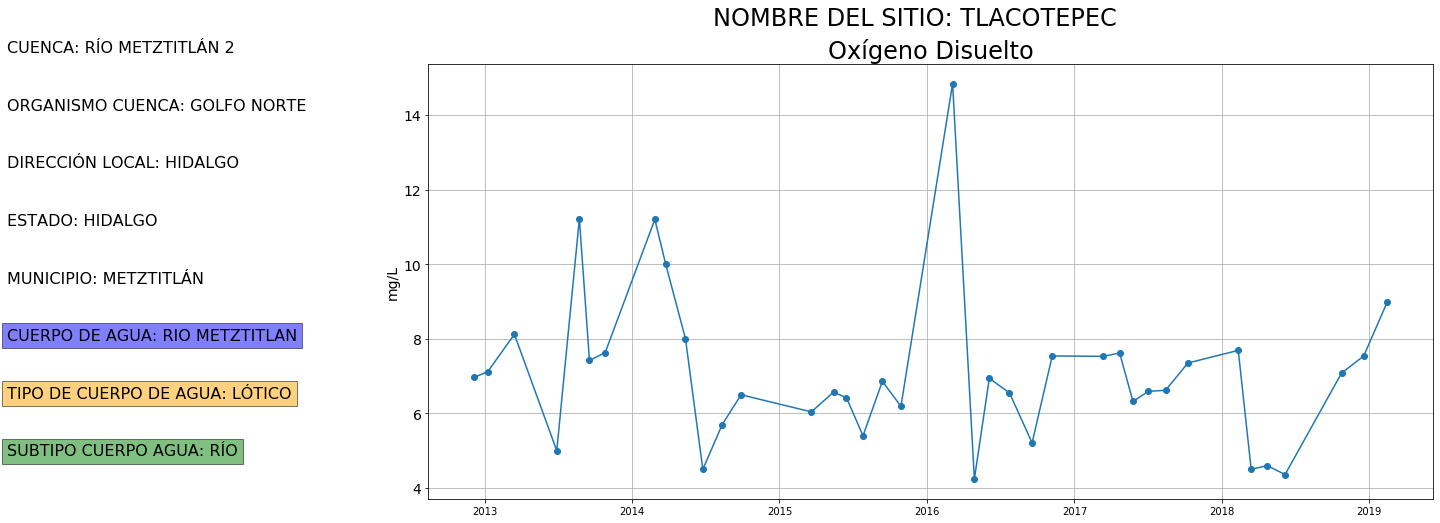

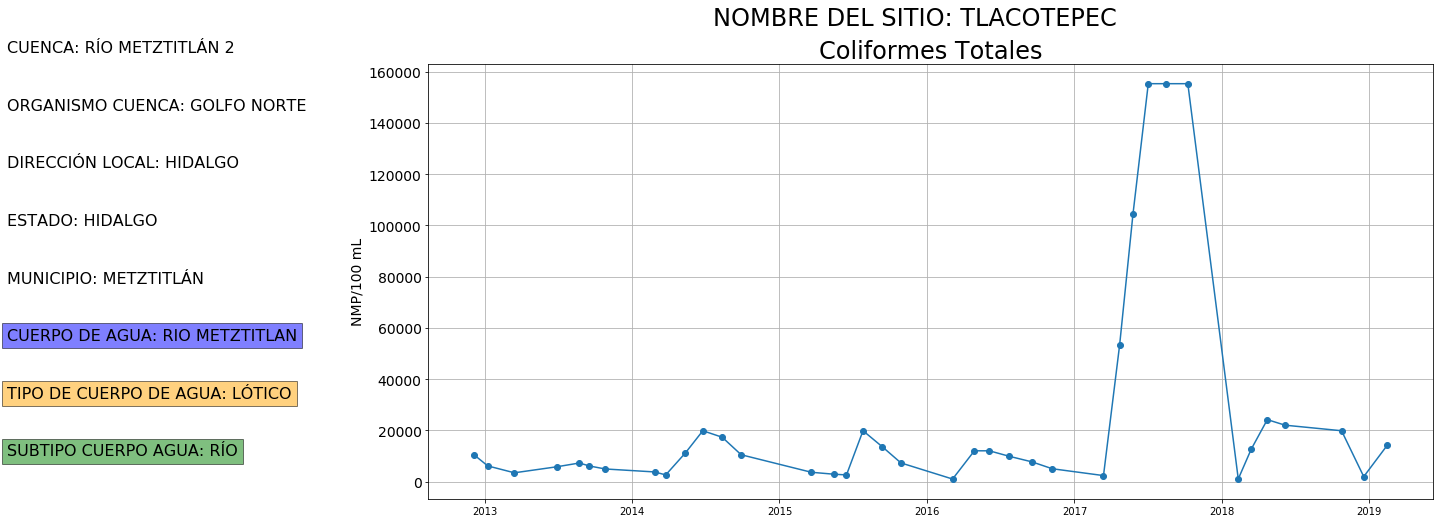

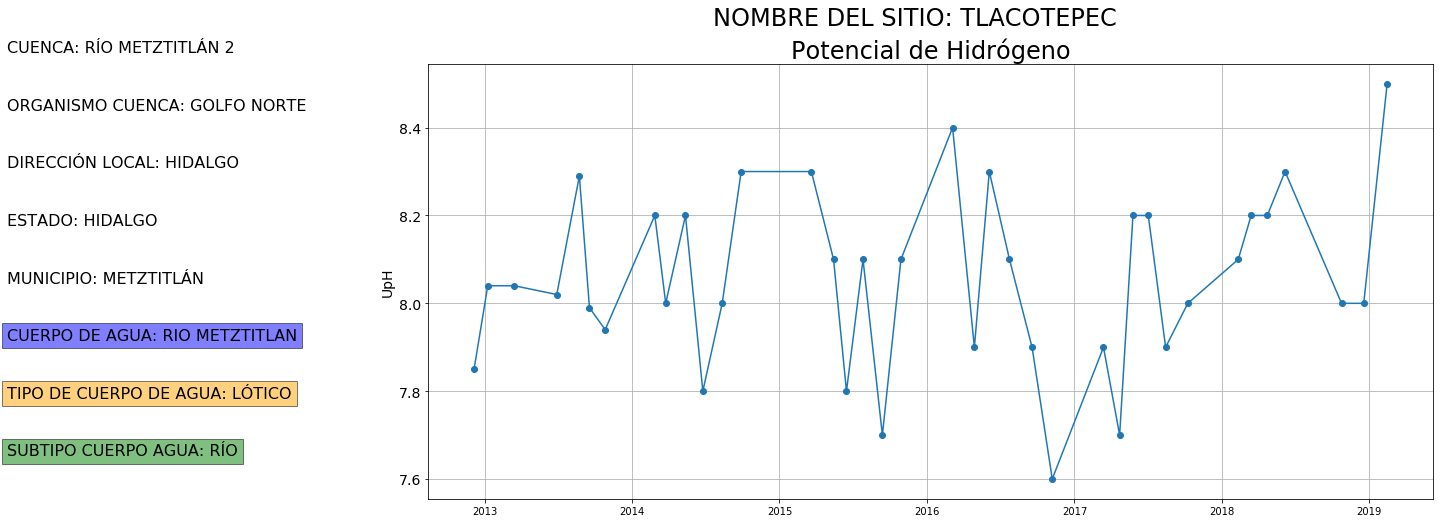

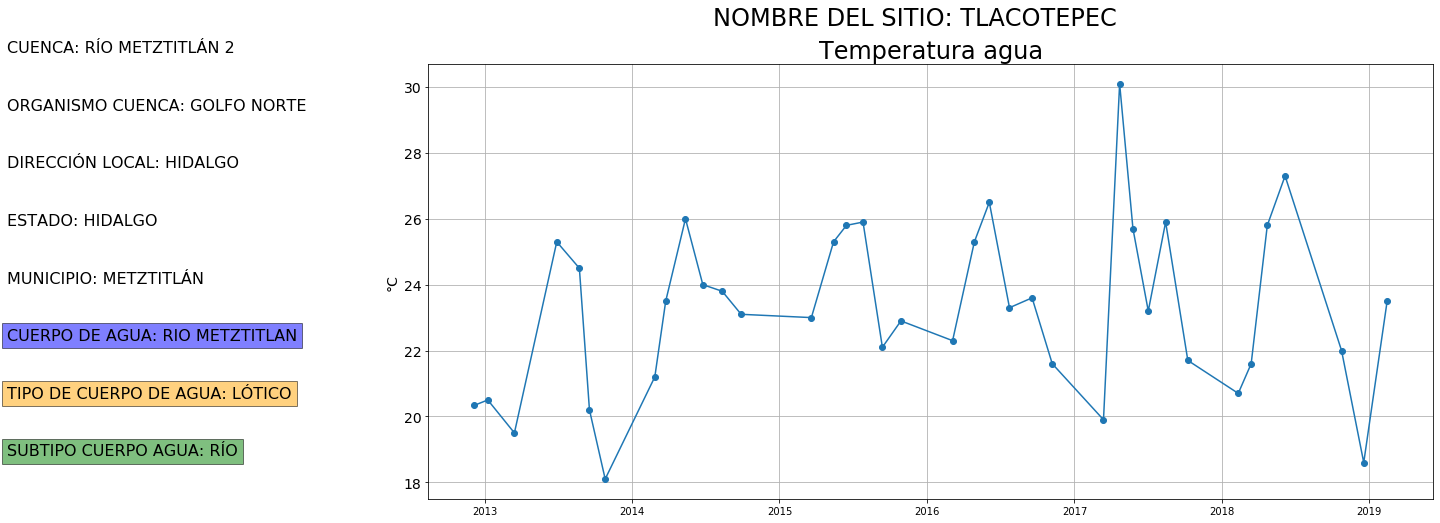

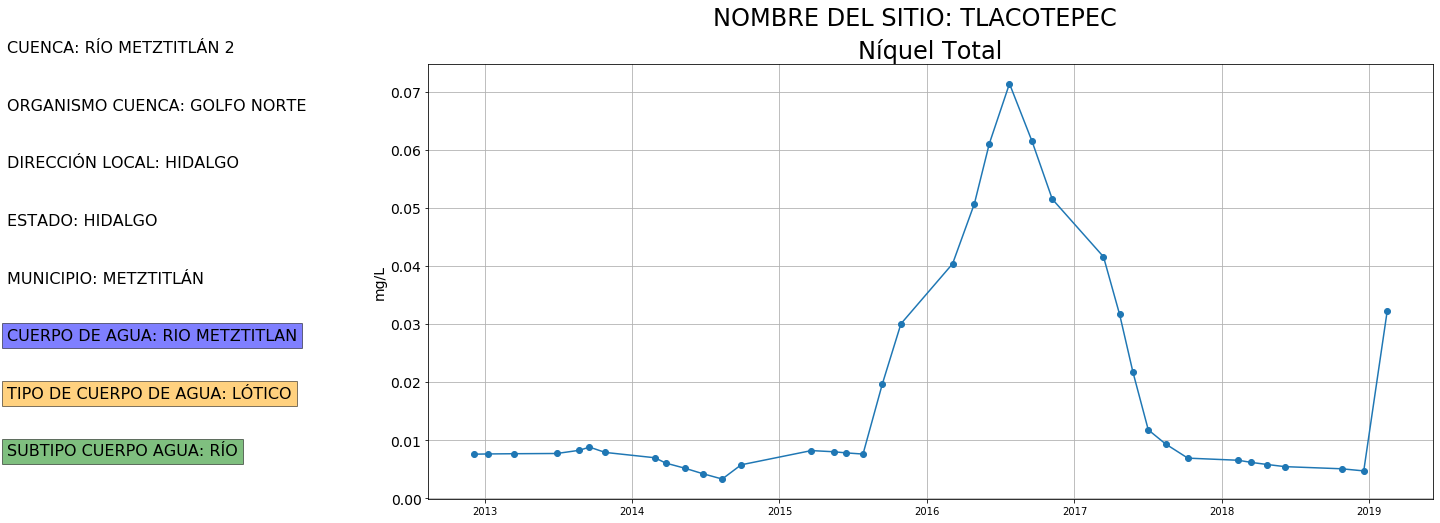

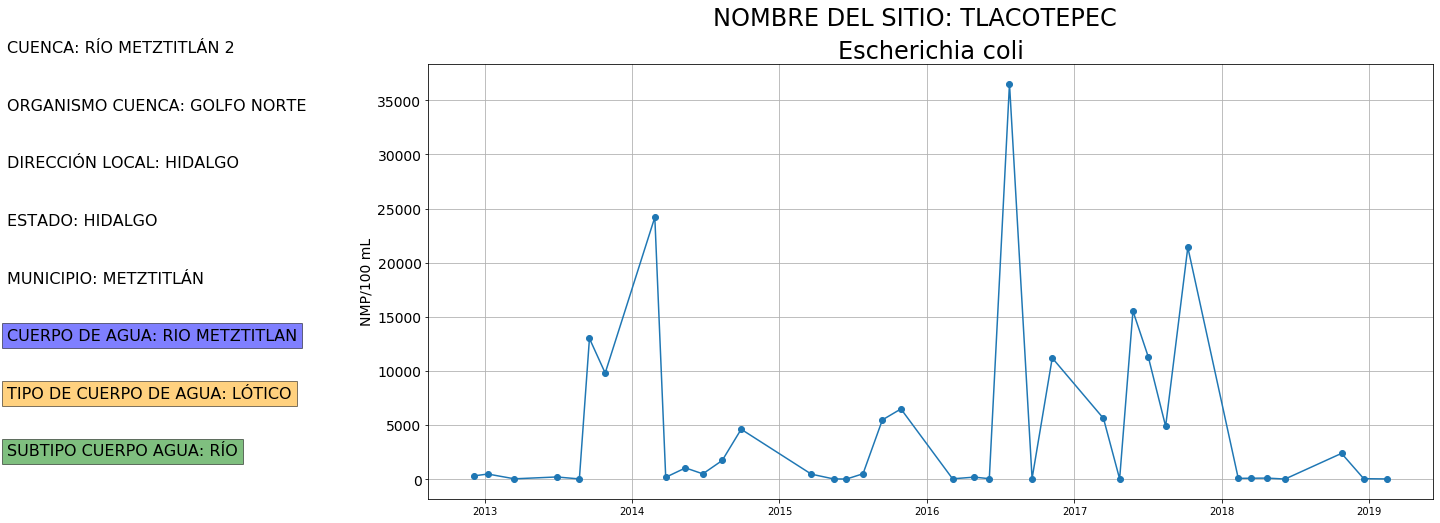

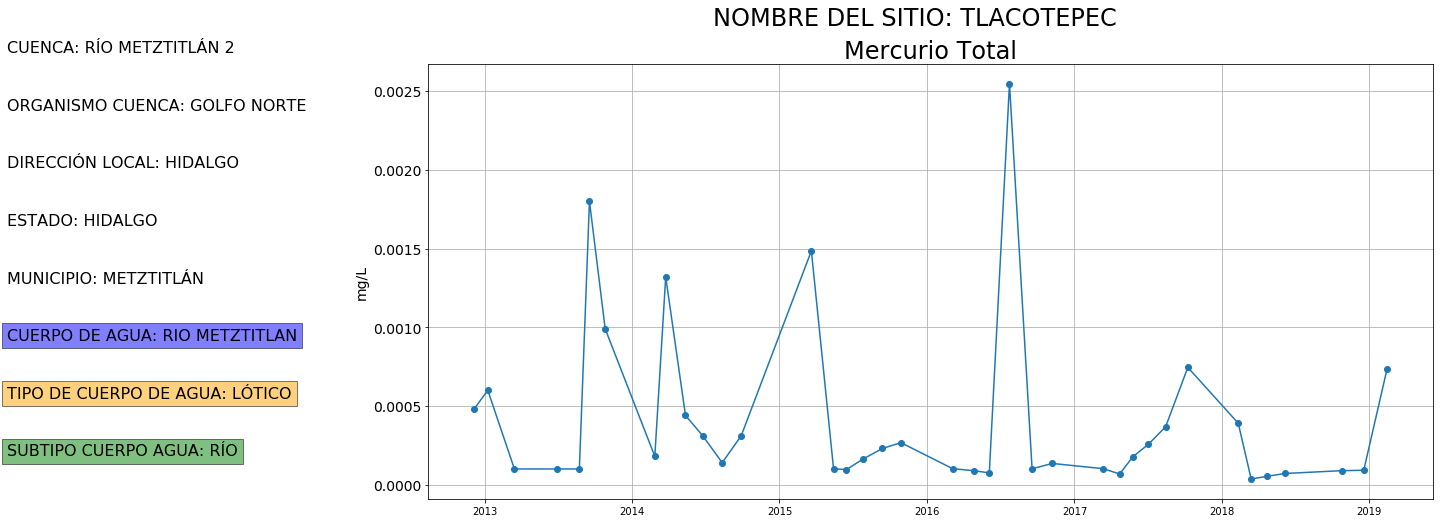

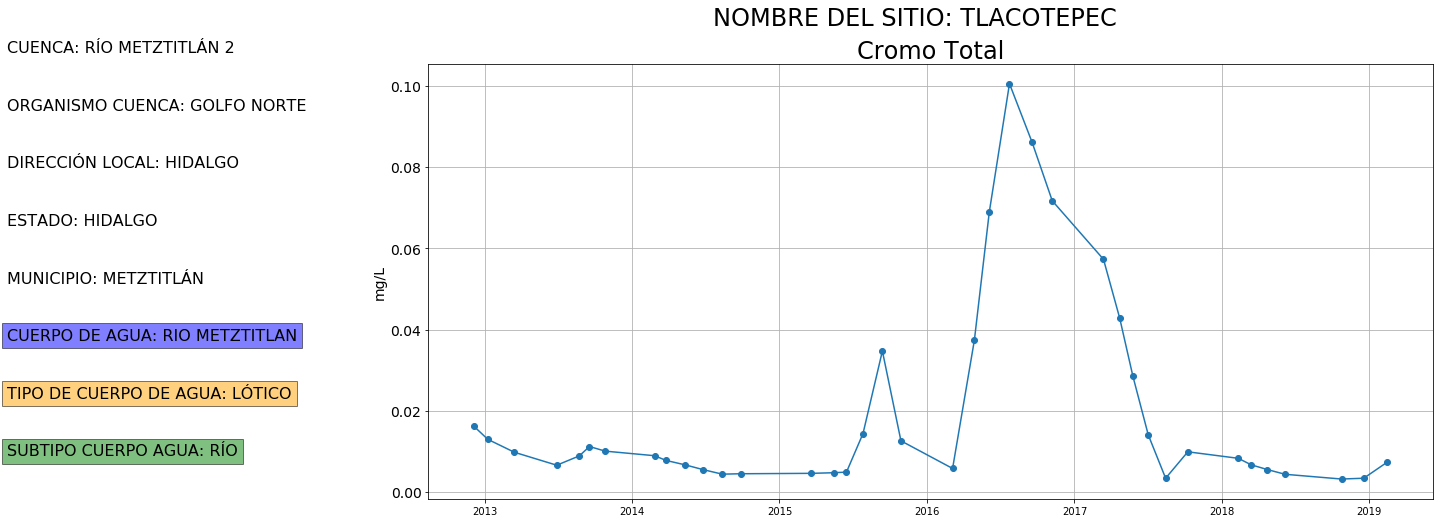

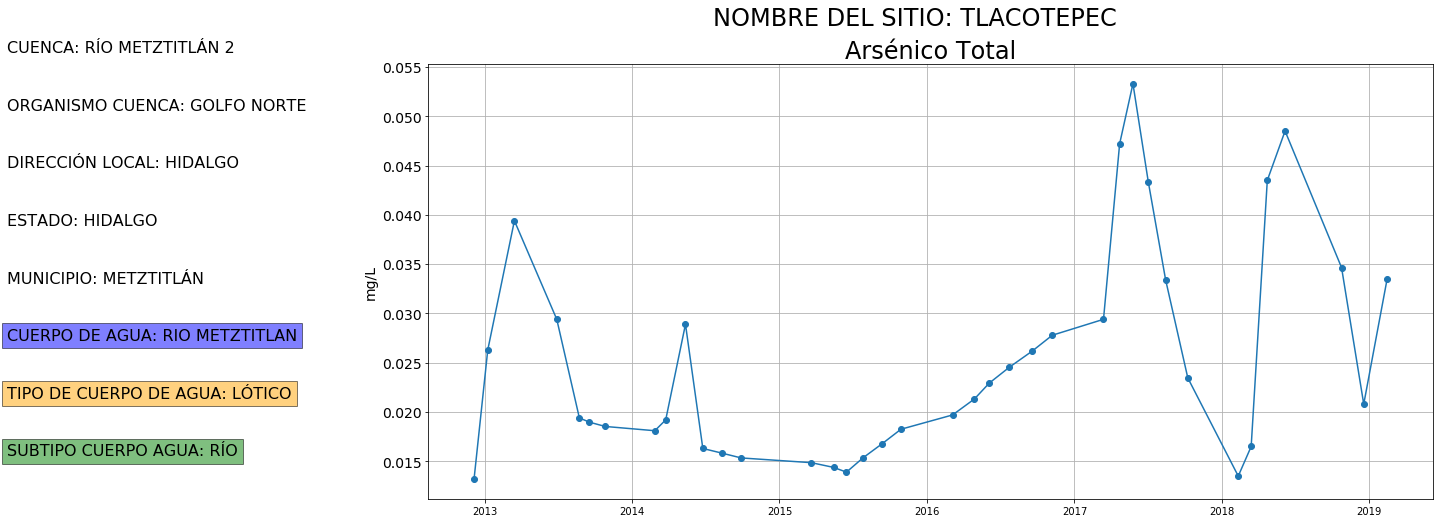

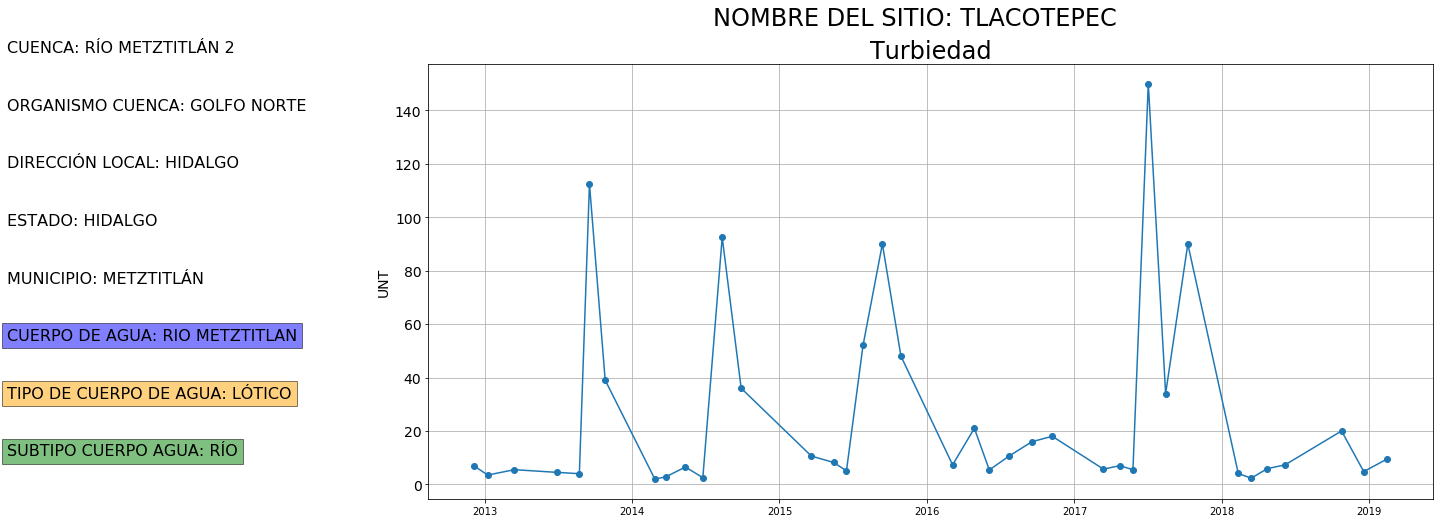

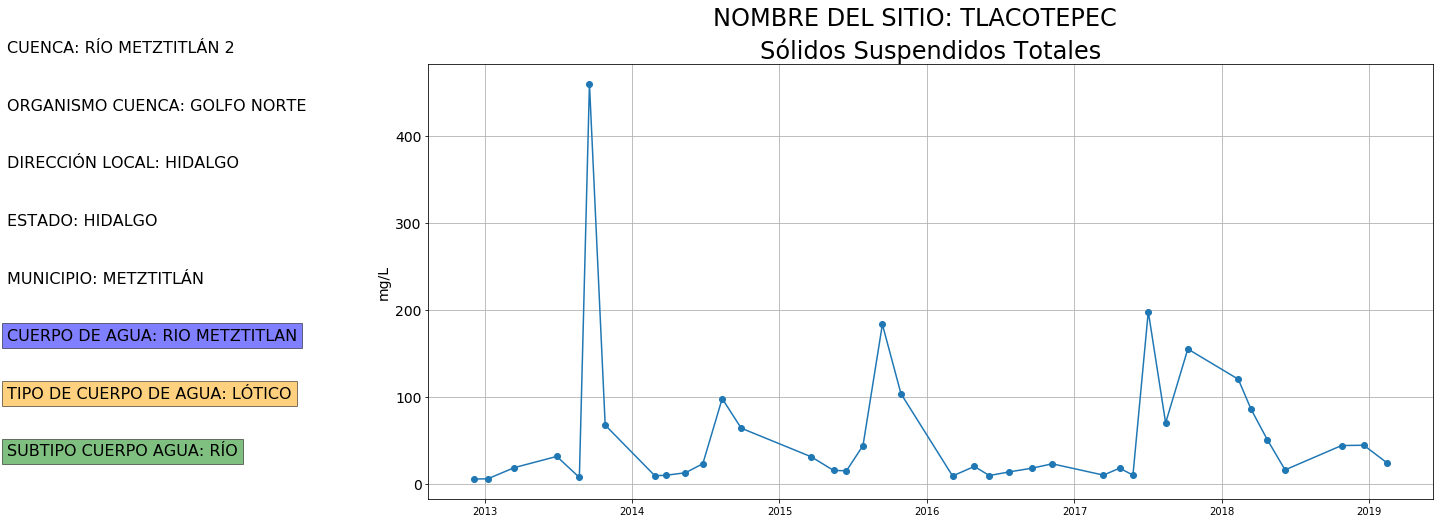

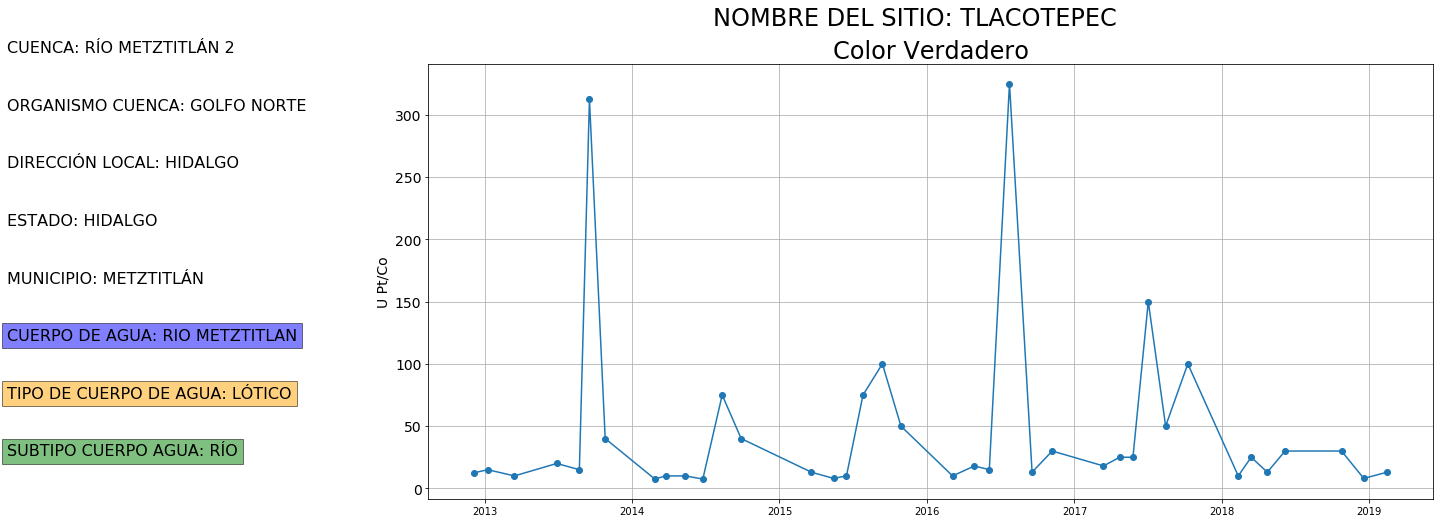

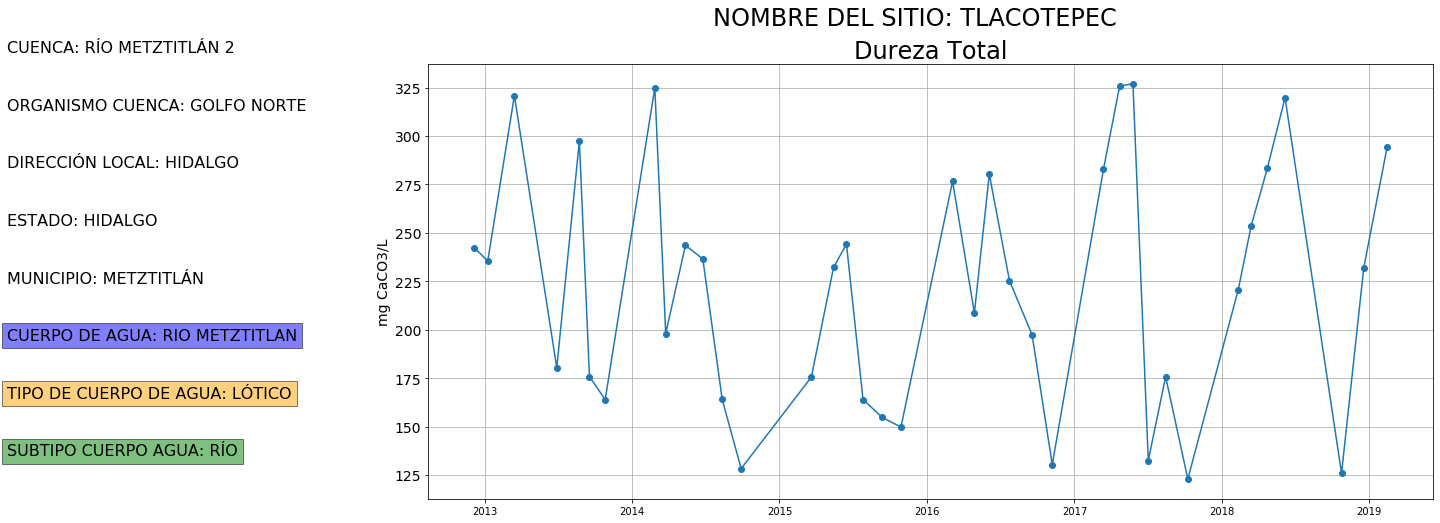

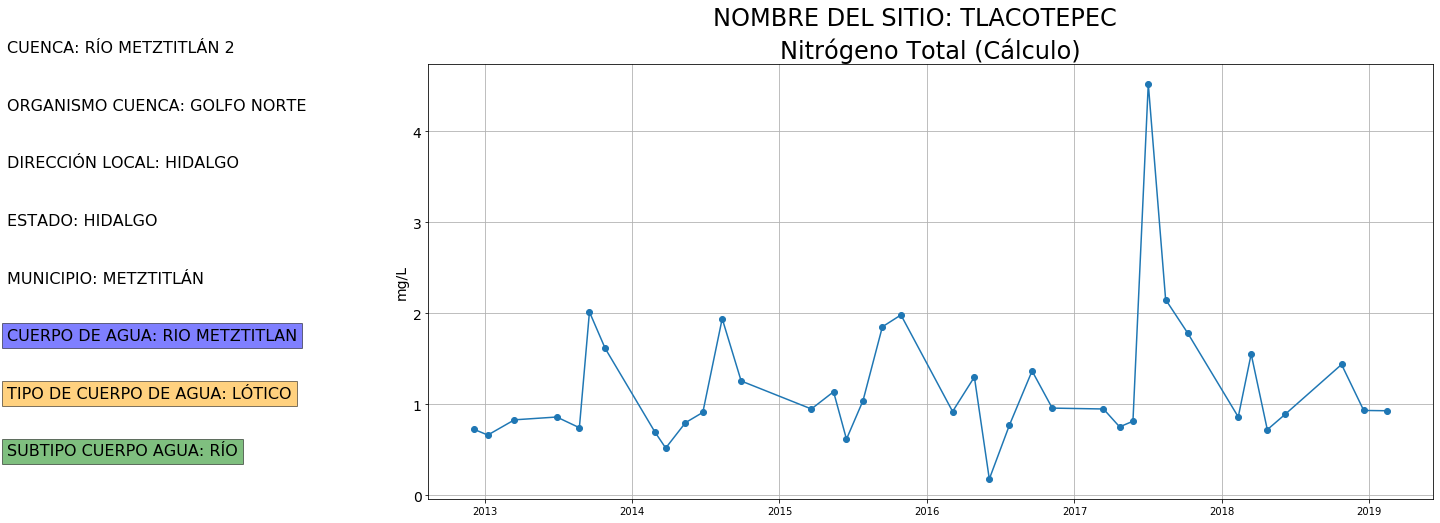

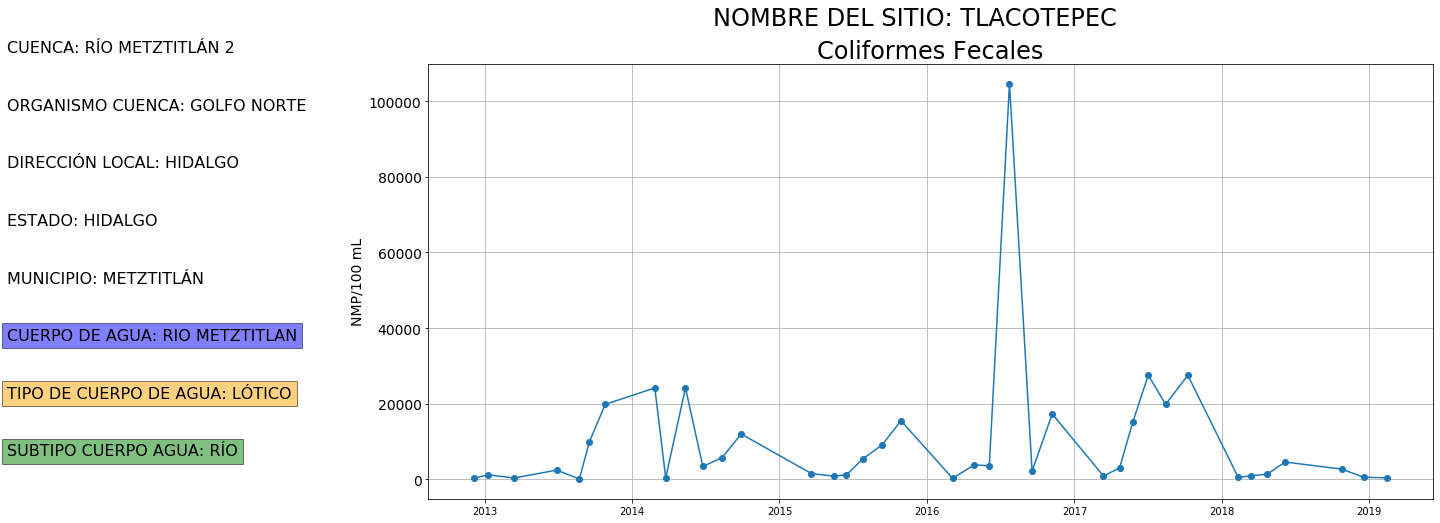

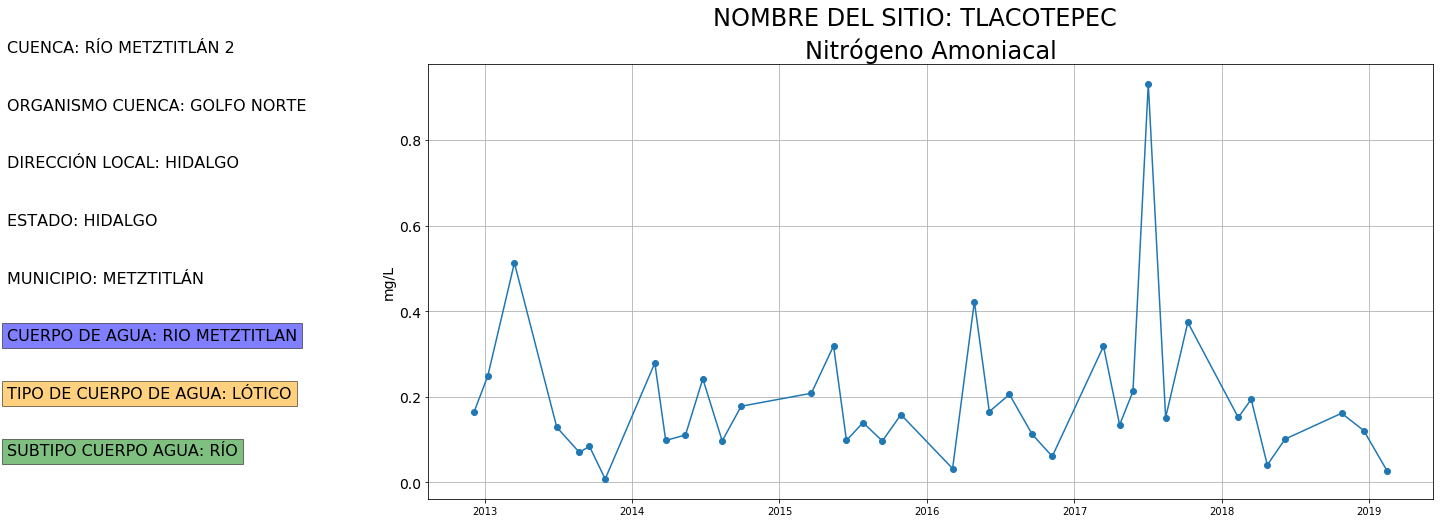

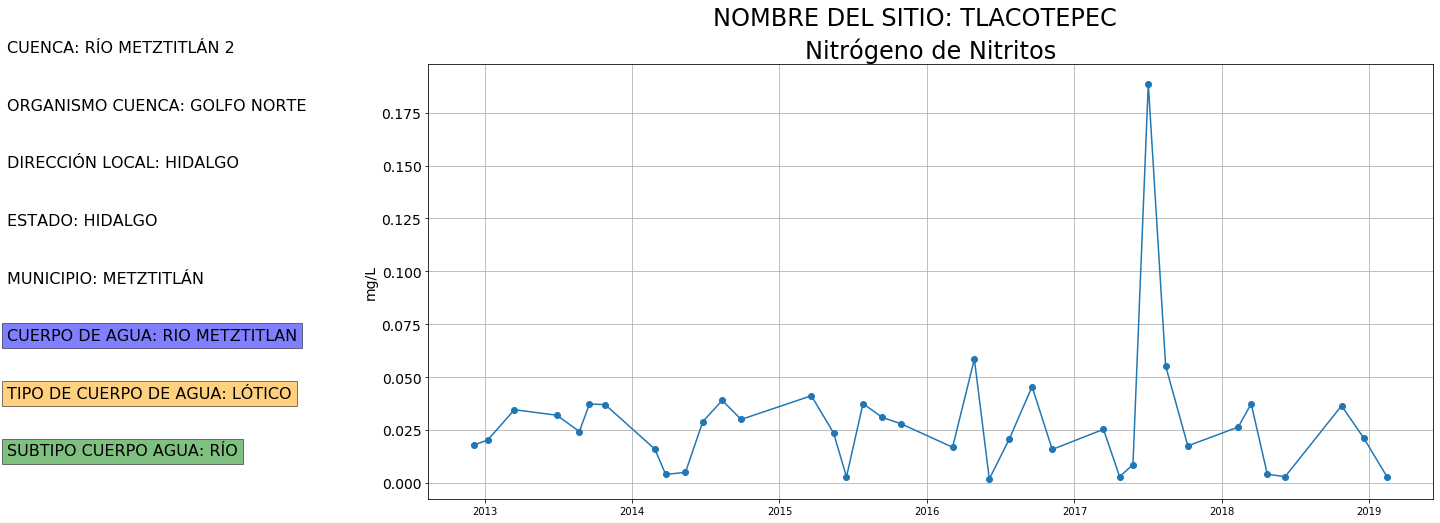

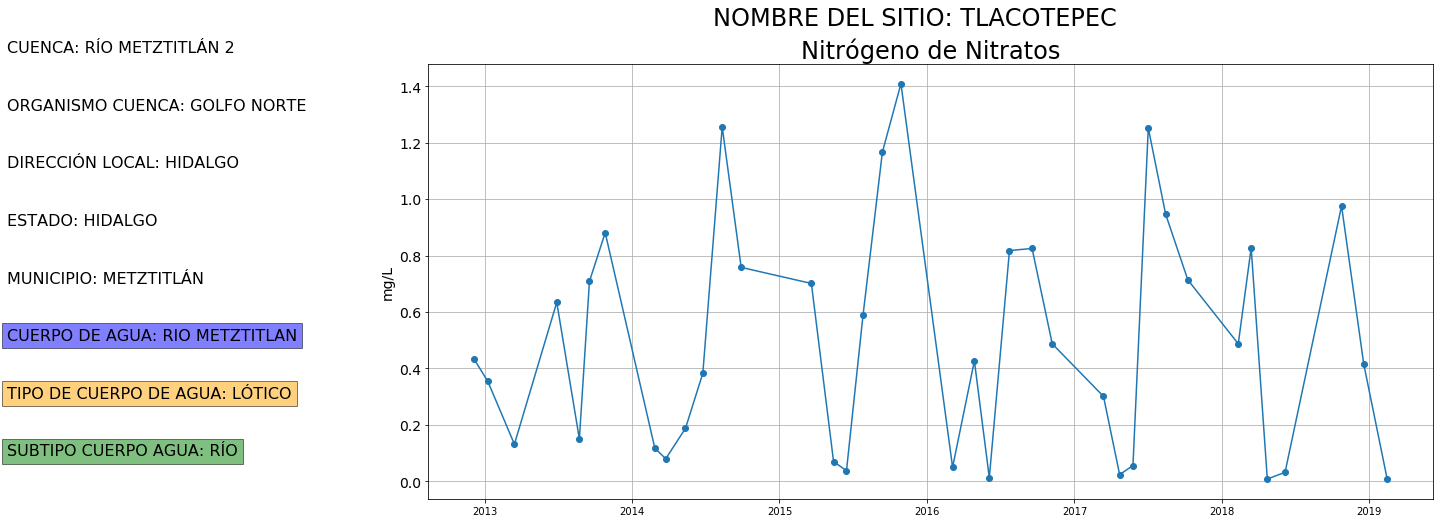

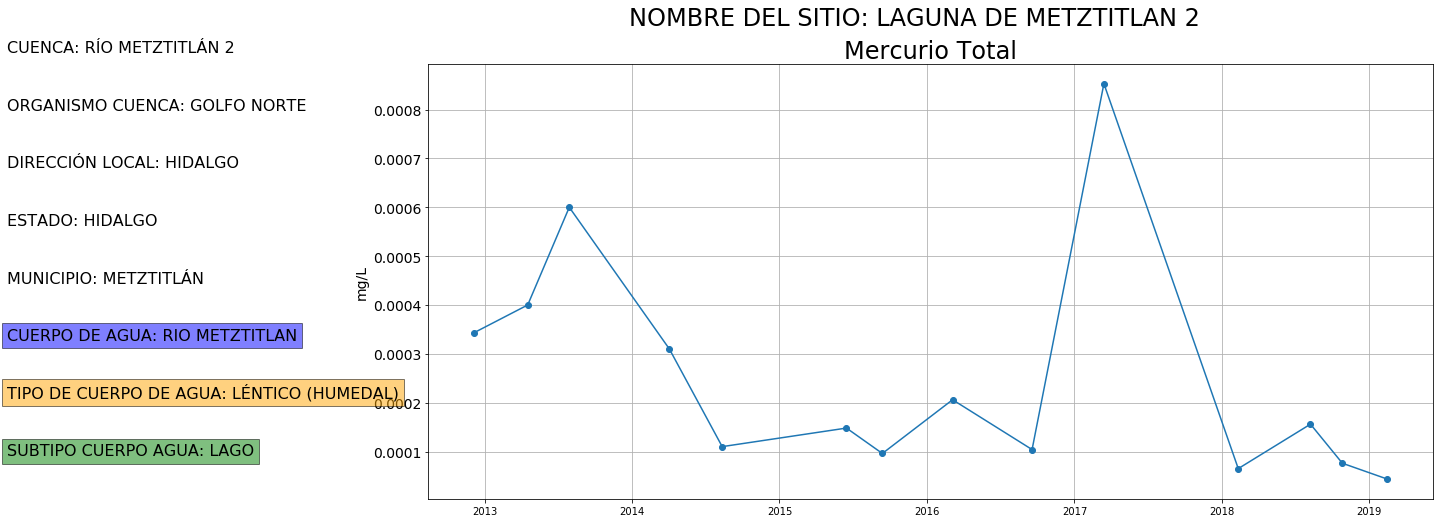

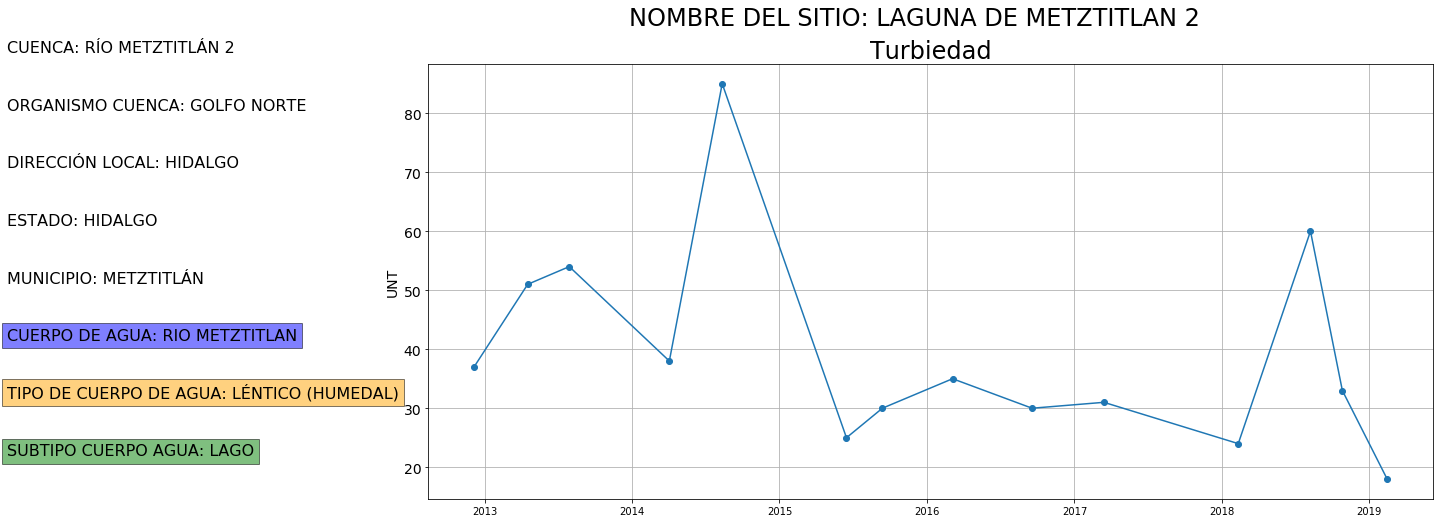

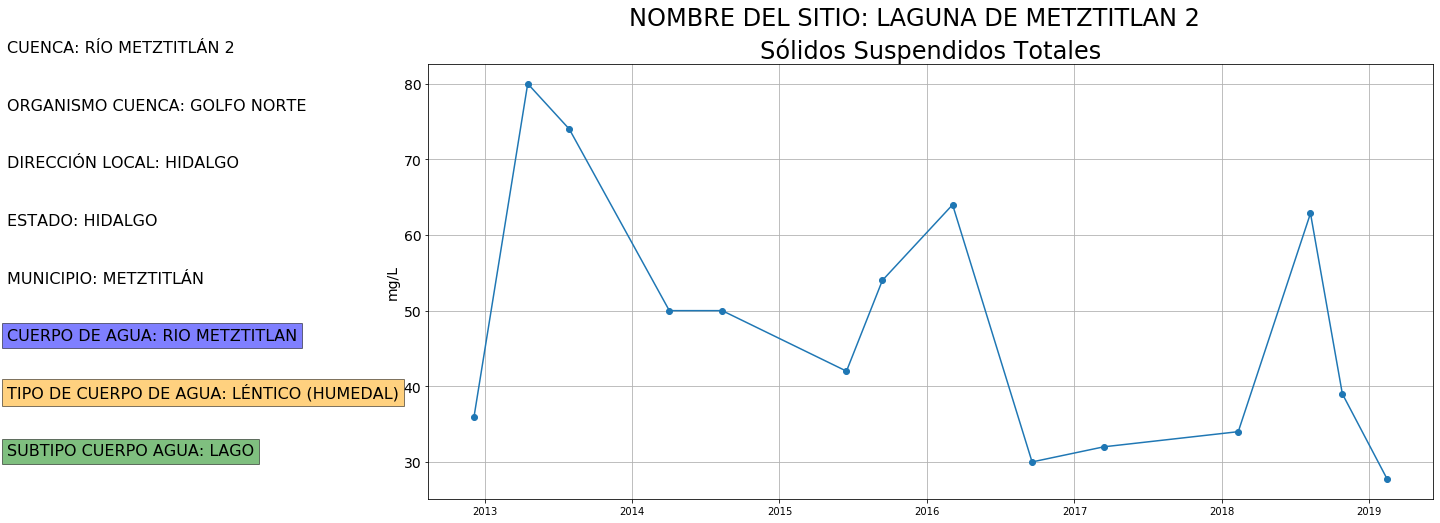

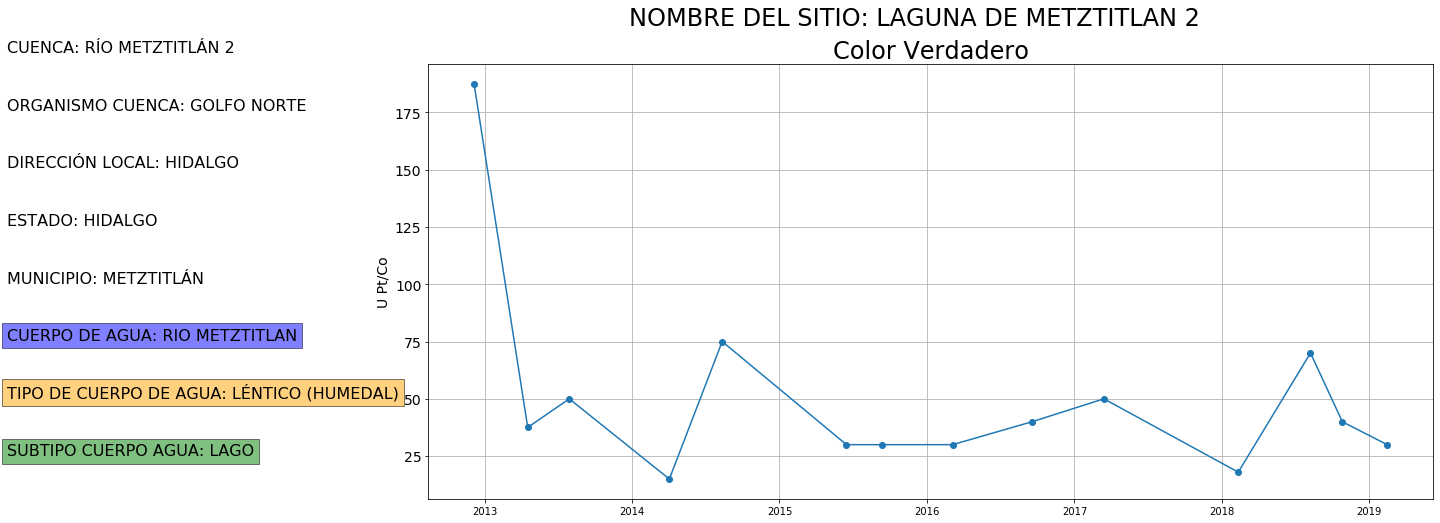

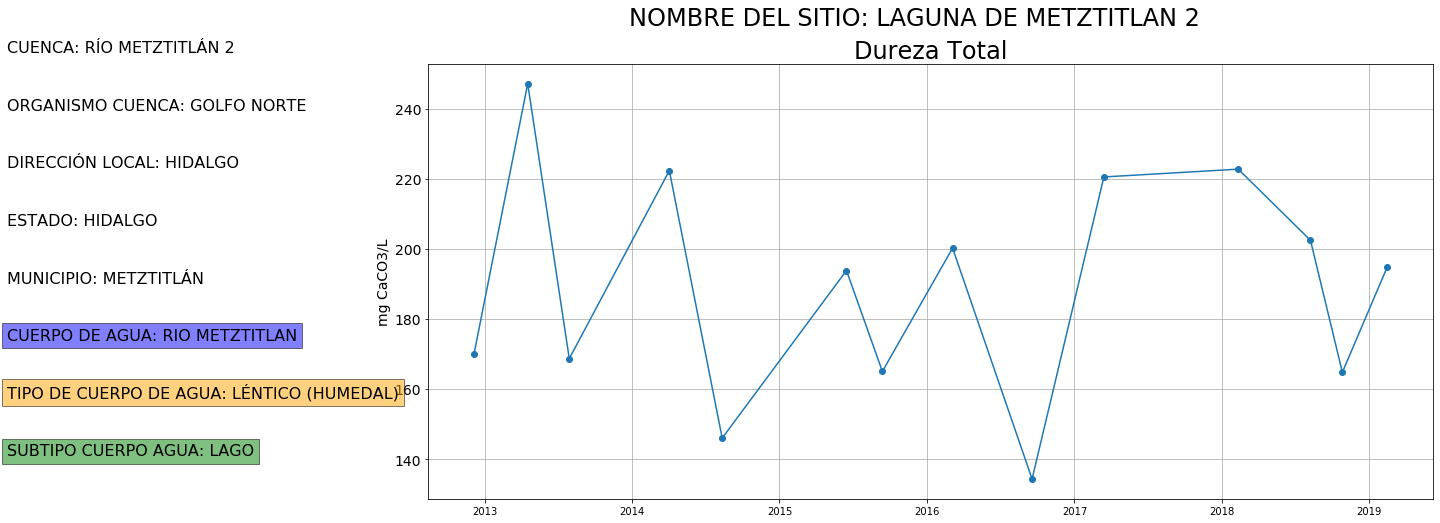

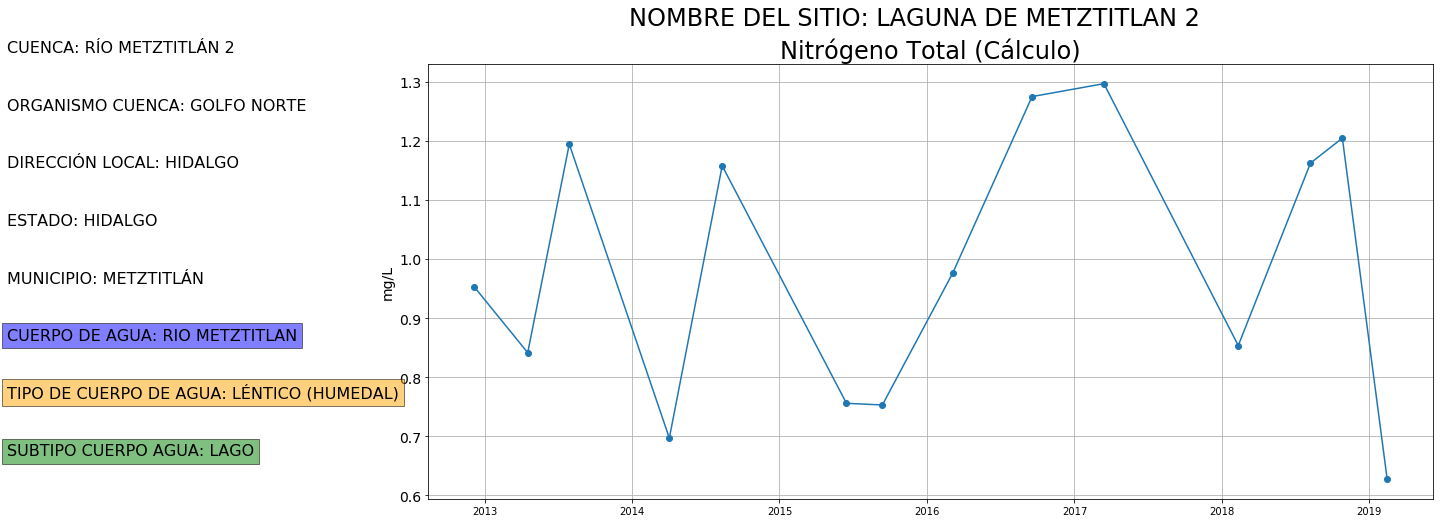

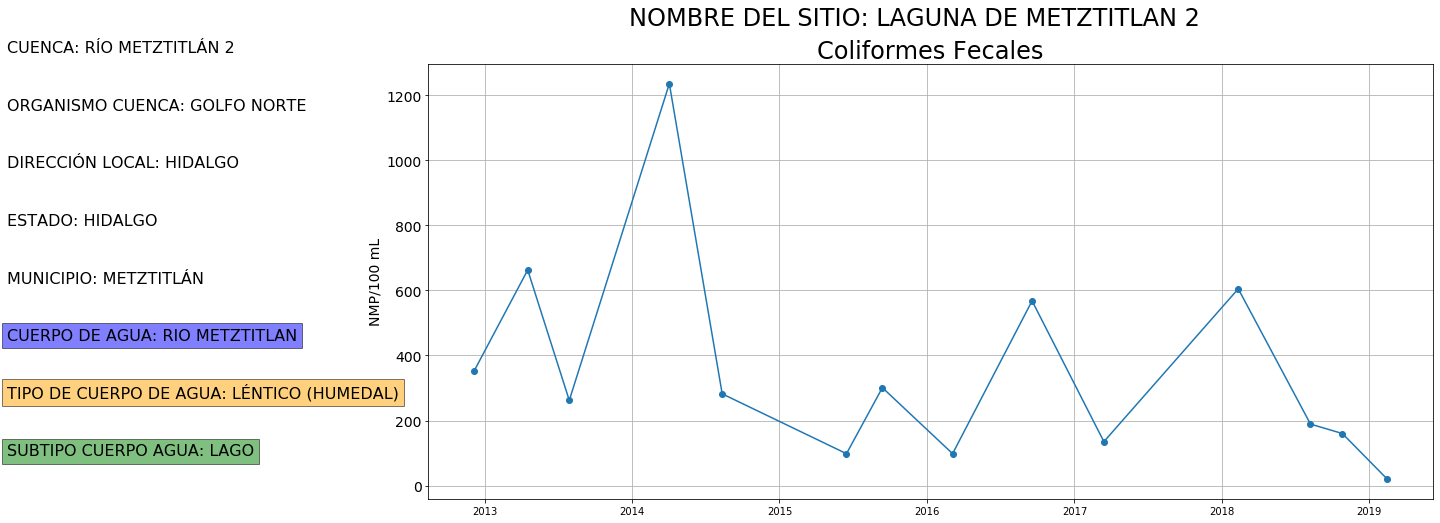

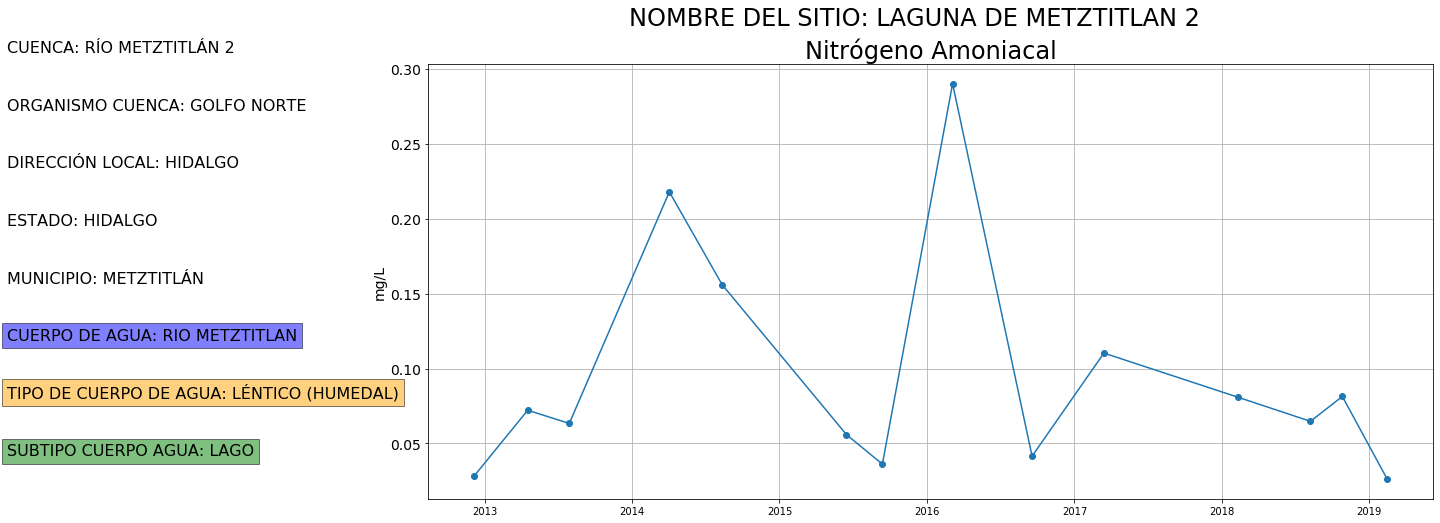

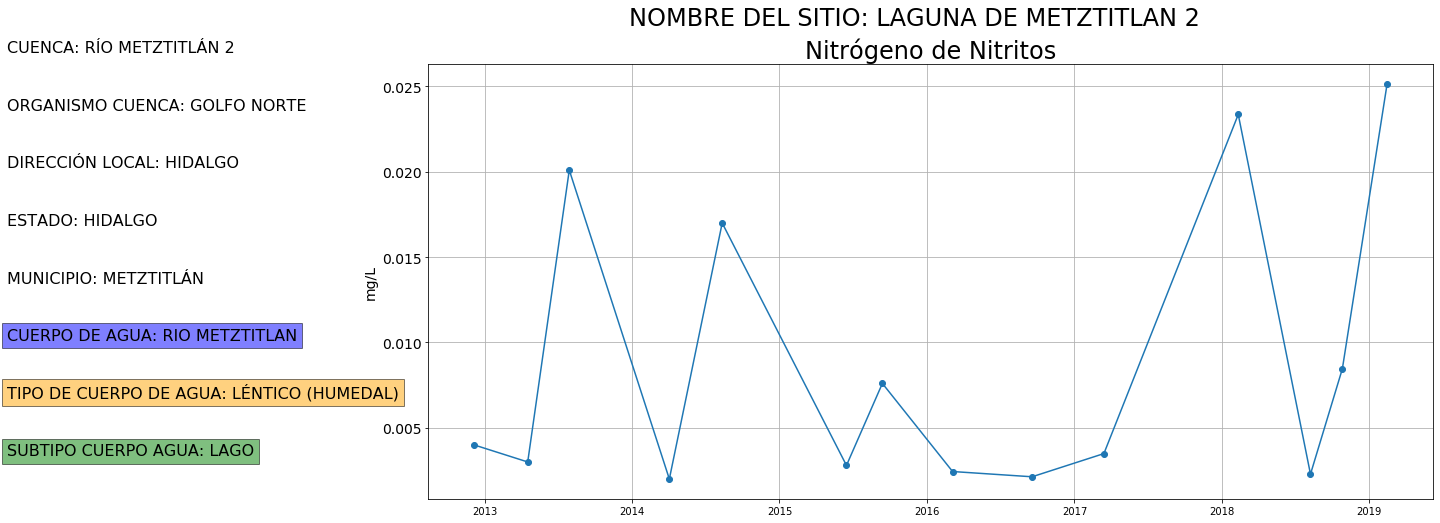

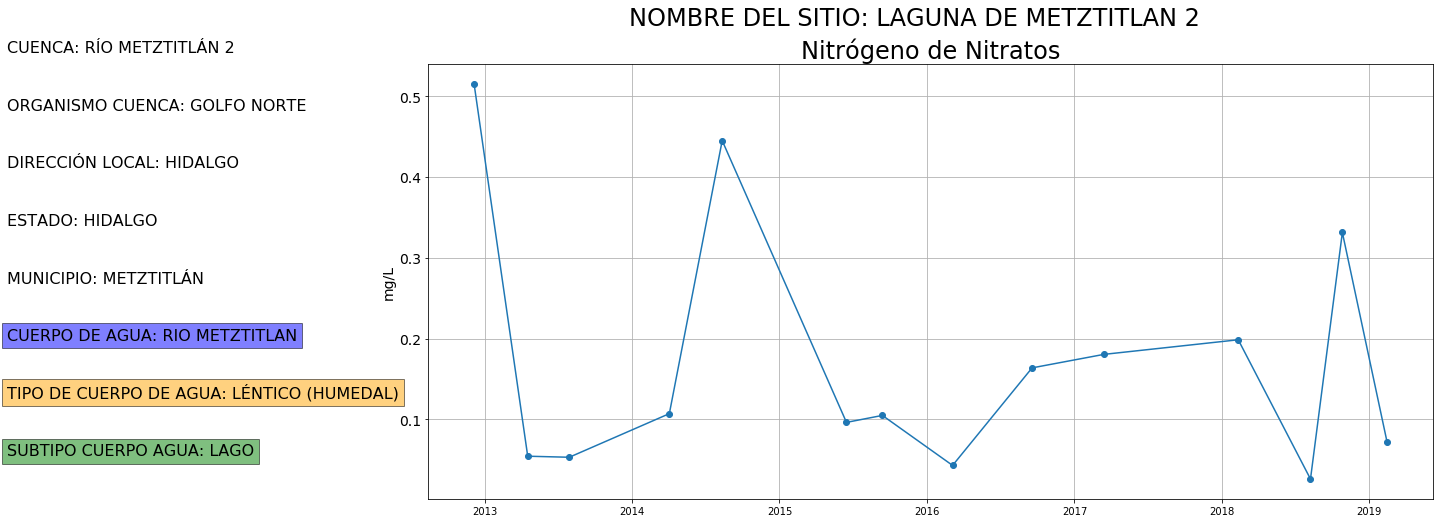

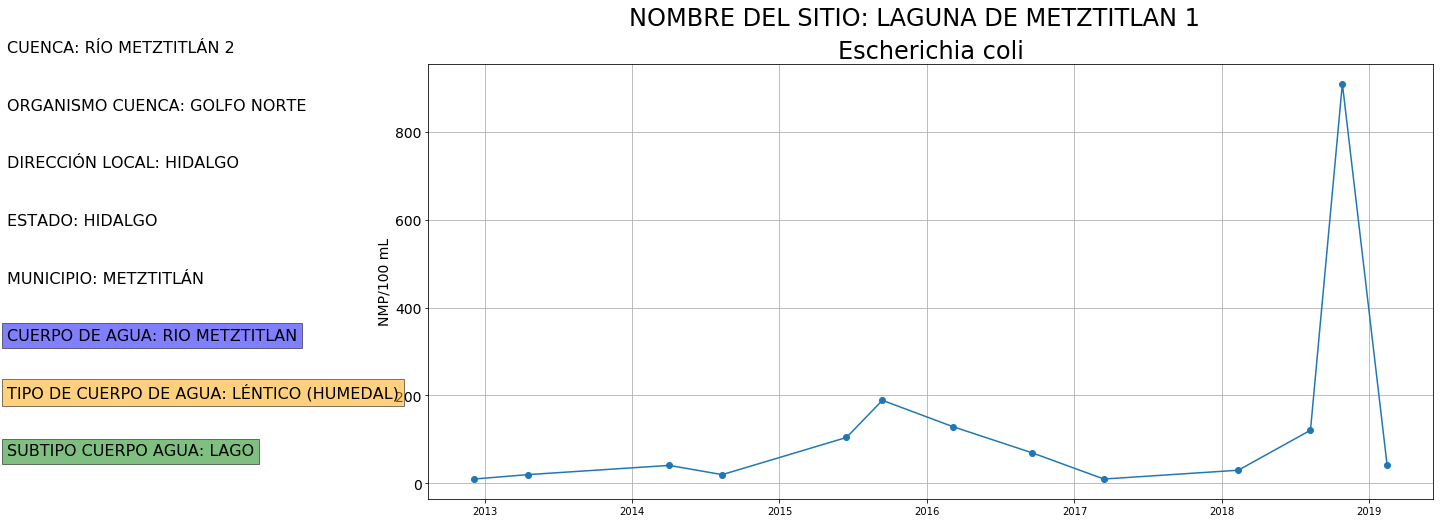

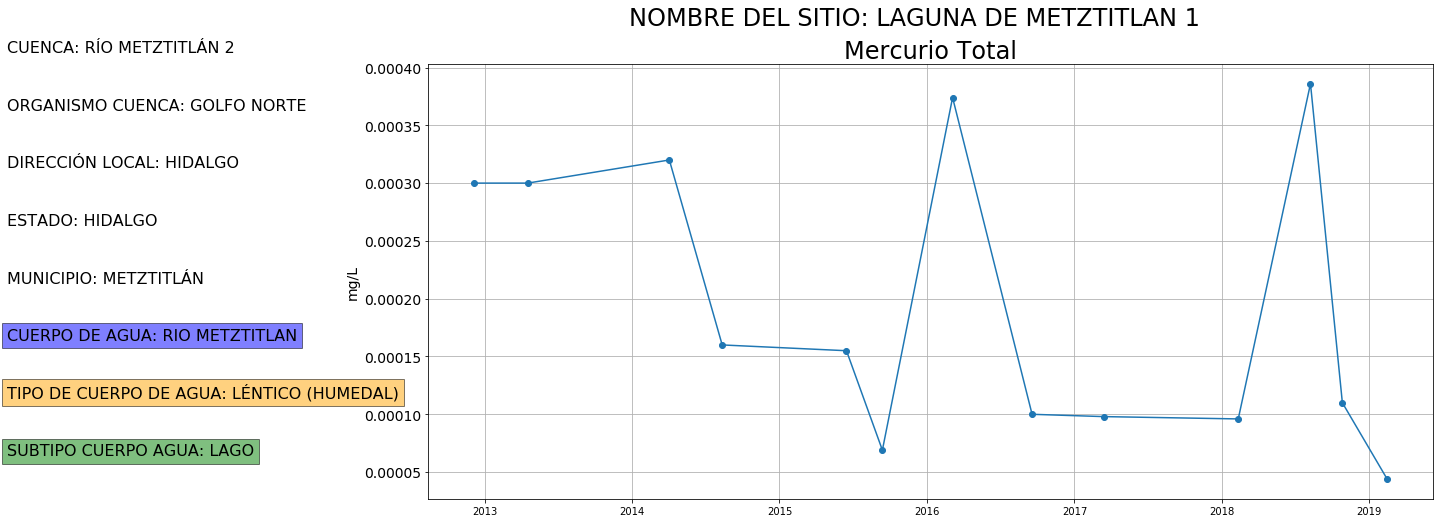

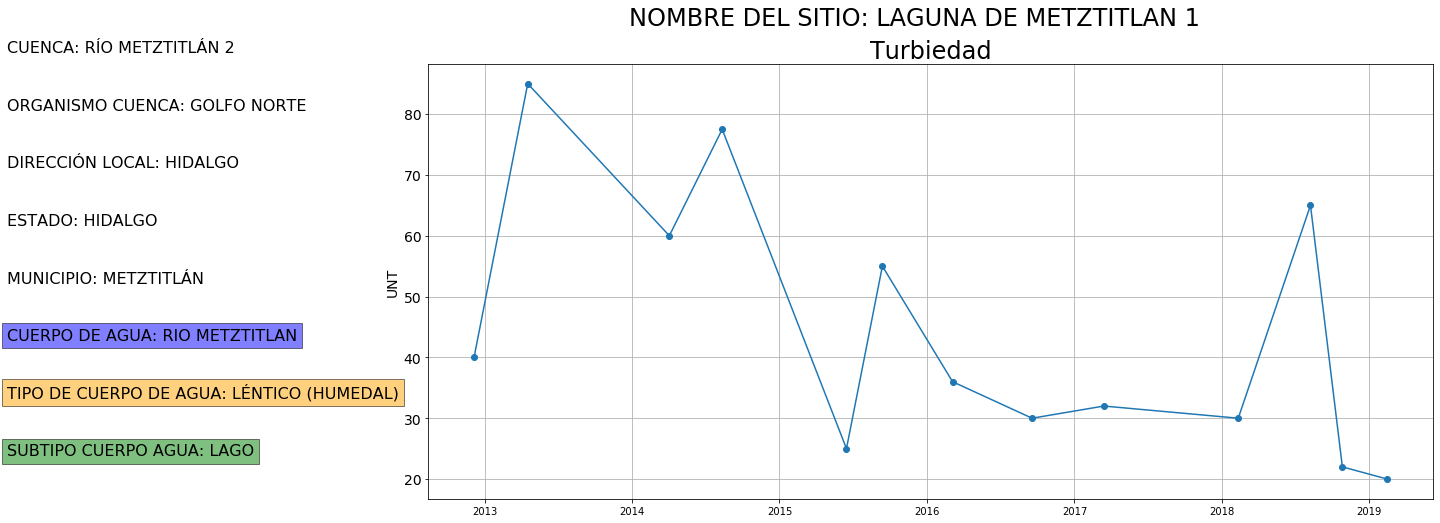

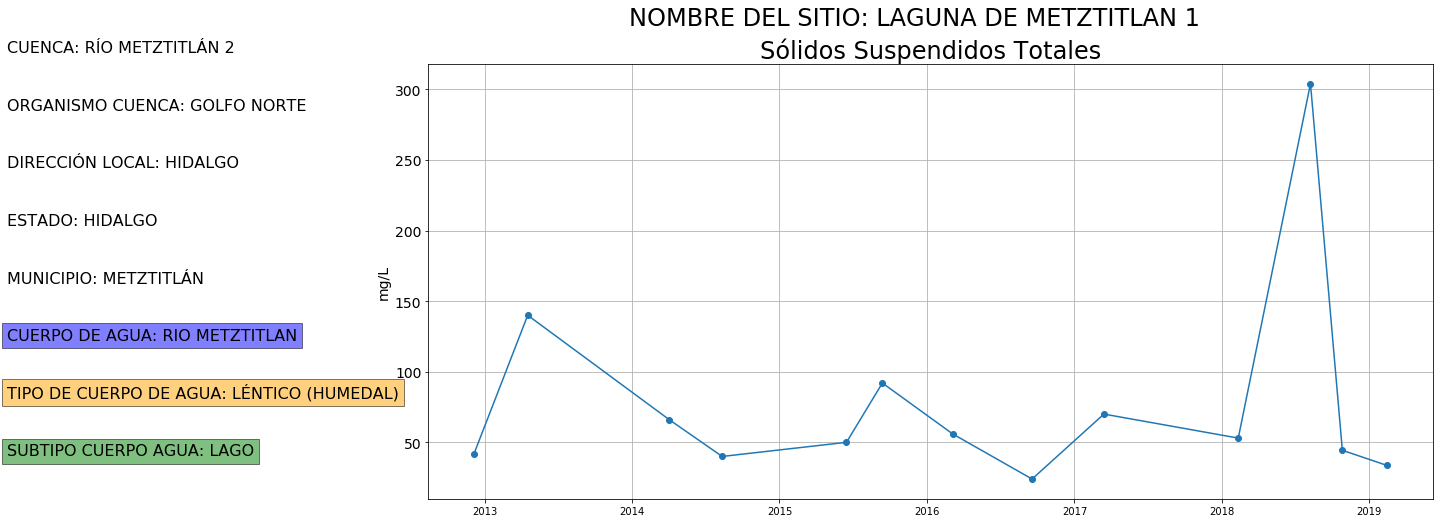

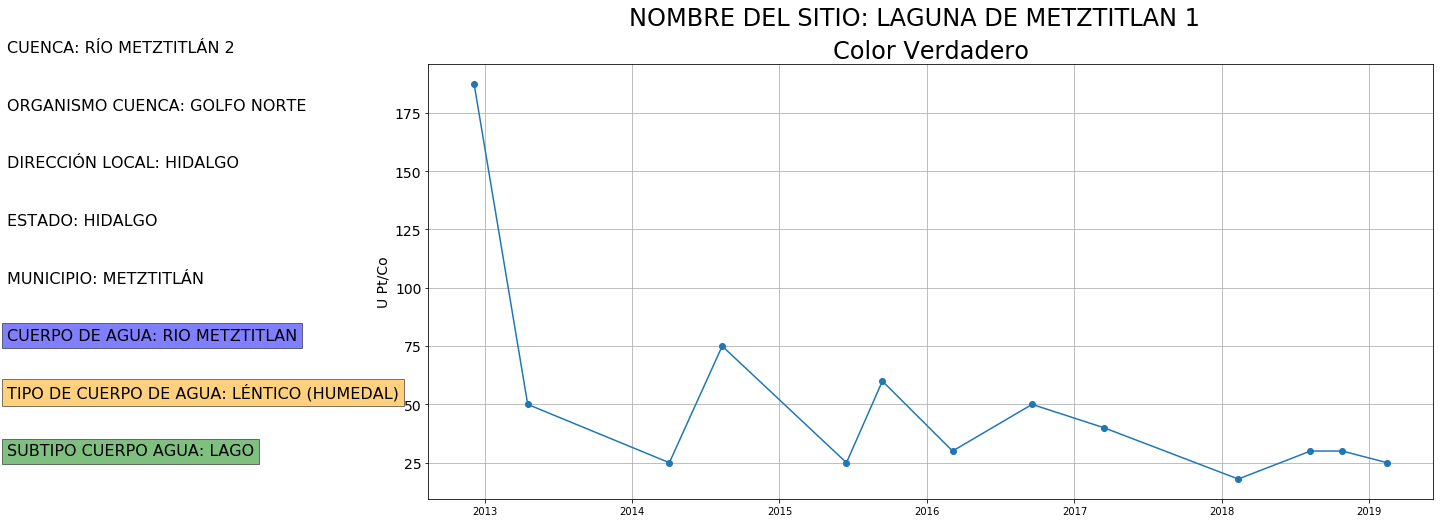

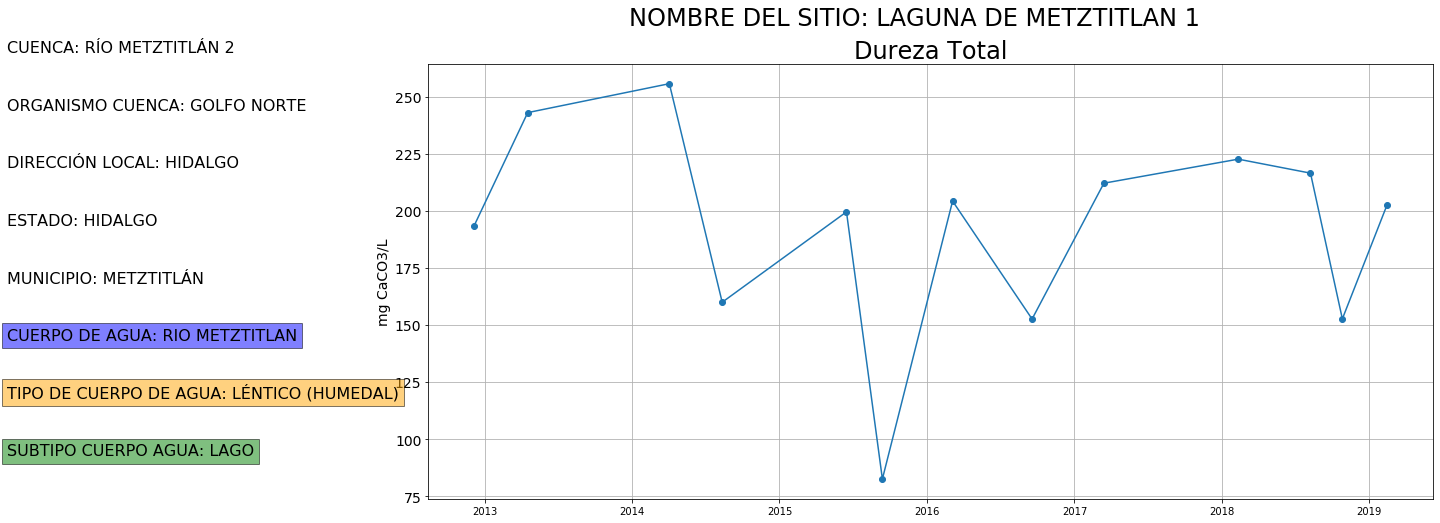

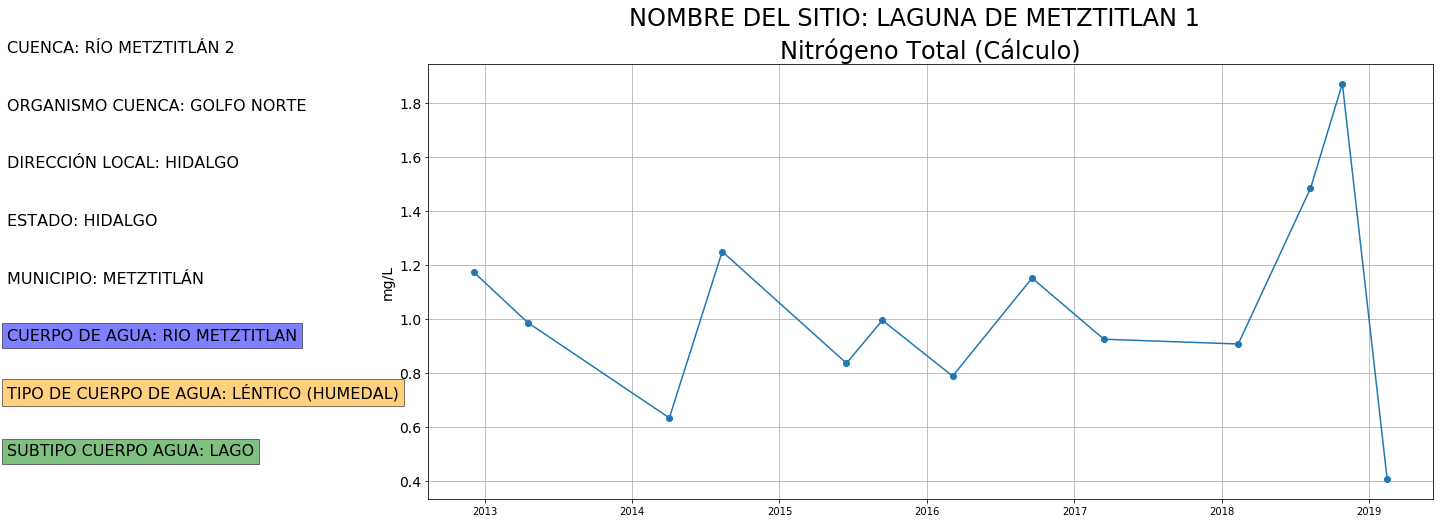

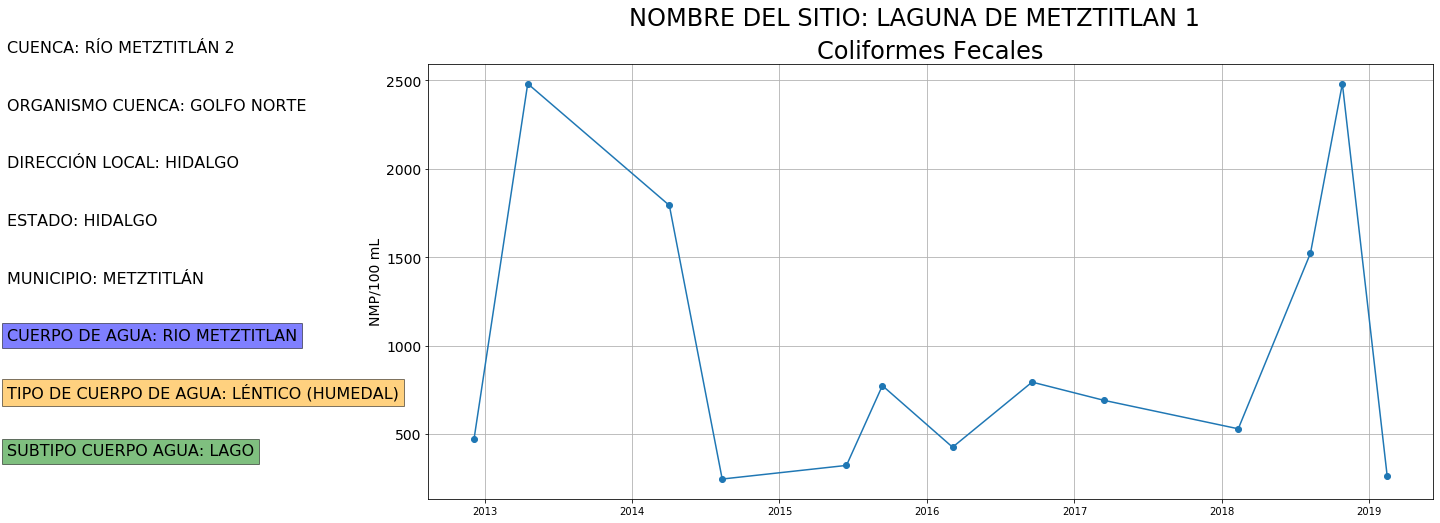

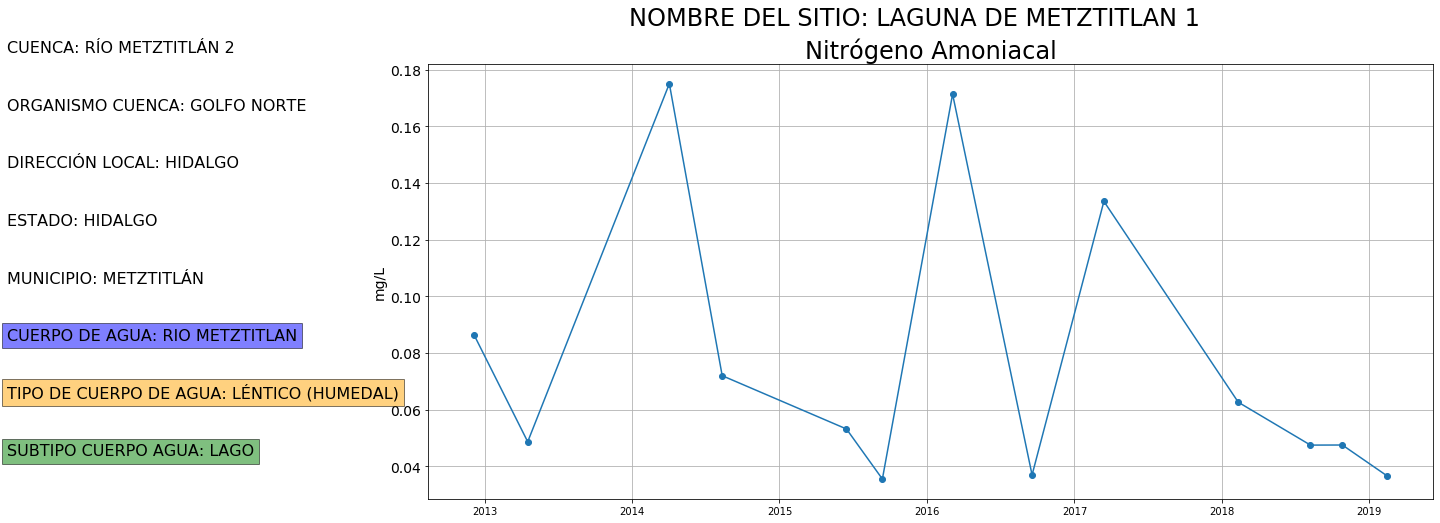

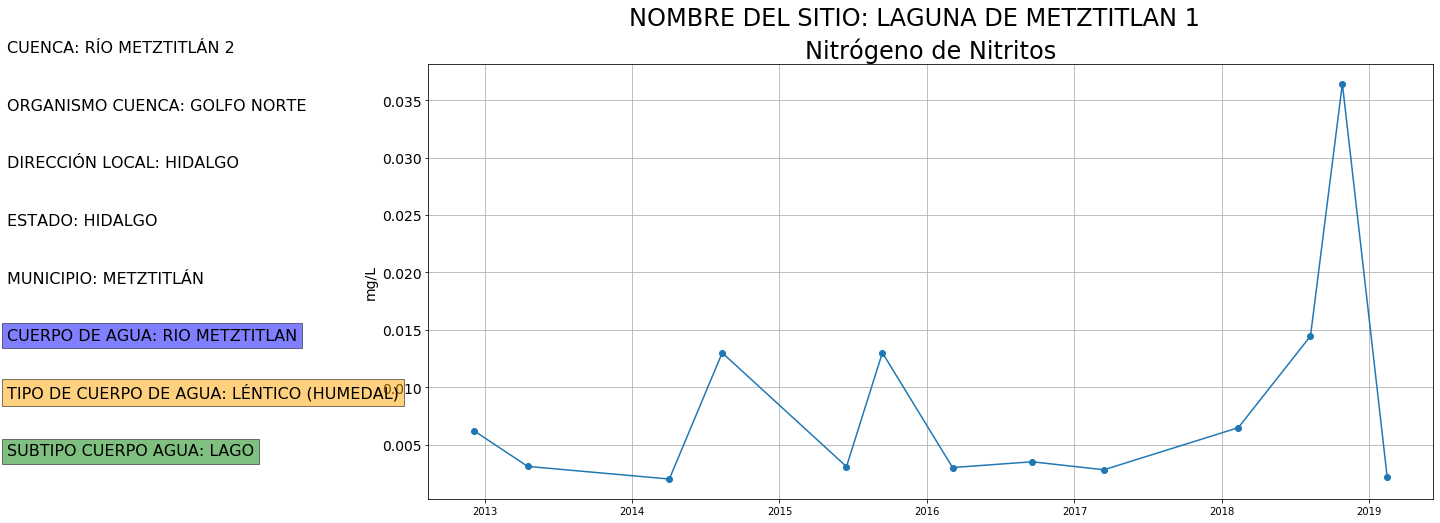

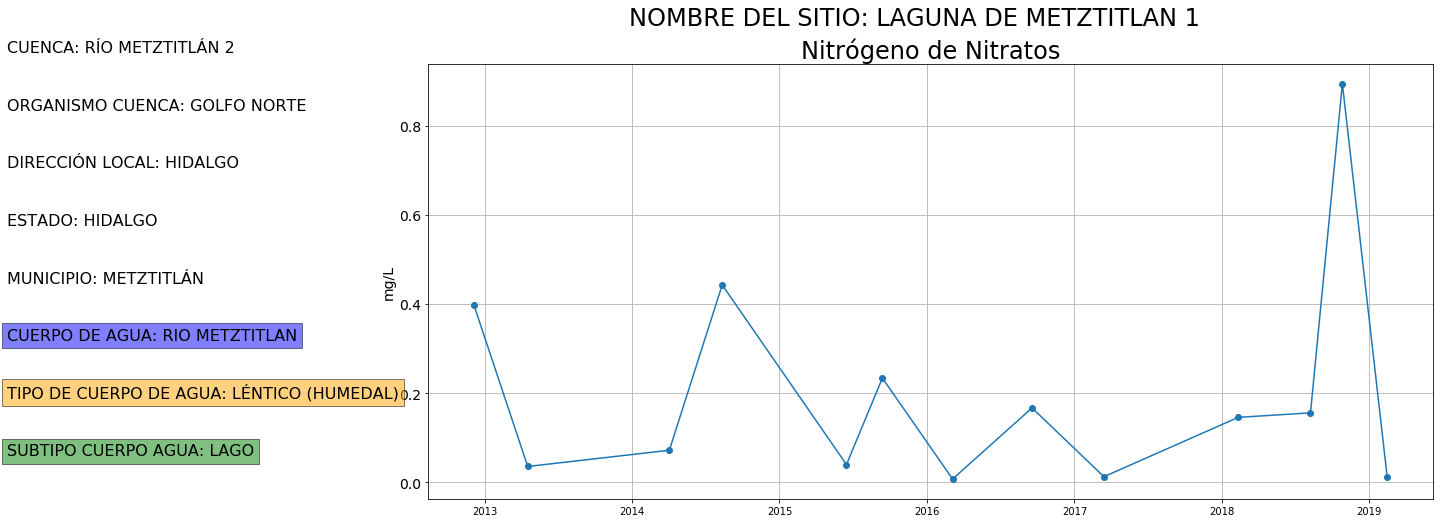

In [91]:
for i in range (0,3):#index of sitios
    df_Metztitlan = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN", na=False)]
    nombre_sitio = df_Metztitlan["NOMBRE DEL SITIO"].array[i]
    index_namecols = df_Metztitlan.iloc[:,:]
    subtitulo = index_namecols.columns[1]+': '+nombre_sitio
    subtitulo_2 = index_namecols.columns[2]+': '+index_namecols.iloc[0+i,2]
    subtitulo_5 = index_namecols.columns[5]+': '+index_namecols.iloc[0+i,5]
    subtitulo_6 = index_namecols.columns[6]+': '+index_namecols.iloc[0+i,6]
    subtitulo_7 = index_namecols.columns[7]+': '+index_namecols.iloc[0+i,7]
    subtitulo_8 = index_namecols.columns[8]+': '+index_namecols.iloc[0+i,8]
    subtitulo_9 = index_namecols.columns[9]+': '+index_namecols.iloc[0+i,9]
    subtitulo_10 = index_namecols.columns[10]+': '+index_namecols.iloc[0+i,10]
    subtitulo_11 = index_namecols.columns[11]+': '+index_namecols.iloc[0+i,11]
    
    
    for j in range(len(cols)):#index of cols variable
    #for j in range(5,6):
        df_rows = df_eti[df_eti['CLAVE PARÁMETRO'] == cols[j]]
        titulo = df_rows['NOMBRE DEL PARÁMETRO']
        titulo = df_rows.iloc[0,1]
        
        
        df_res_full[cols[j]] = pd.to_numeric(df_res_full[cols[j]].interpolate(method='linear', axis=0, limit_direction='both', limit=8), downcast="float",errors='coerce')
        #df_res_full[cols[j]].interpolate(method='linear', axis=0, limit_direction='both', limit=8)
        #df_res_2019[cols[j]] = pd.to_numeric(df_res_2019[cols[j]], downcast="float",errors='coerce')
        df_cuerpo_de_agua = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN", na=False)]        

        key_array_df = df_cuerpo_de_agua["CLAVE SITIO"].array[i]
        
        #Data 2012-2018
        serie_2018 = df_res_2018[df_res_2018["CLAVE SITIO"].str.contains(key_array_df, na=False)]
        serie_2018_full = df_res_full[df_res_full["CLAVE SITIO"].str.contains(key_array_df, na=False)]
        serie_2018_full[cols[j]].replace('\< | \>', '')
               
        
        #Data 2019
        #serie_2019 = df_res_2019[df_res_2019["CLAVE SITIO"].str.contains(key_array_df, na=False)]
        #serie_2019[cols[j]].replace('\< | \>', '')
        #serie_2019[cols[j]].dropna()
        
        if ((serie_2018[cols[j]].dropna().shape[0]+serie_2019[cols[j]].dropna().shape[0])>=10):
            
            rcParams['figure.figsize'] = 18, 8
            
            plt.figure()
            plt.title(titulo, fontsize=24)
            plt.suptitle(subtitulo, fontsize=24)
            
            plt.figtext(-0.2, 0.9, subtitulo_2, ha="left", fontsize=16)
            plt.figtext(-0.2, 0.8, subtitulo_5, ha="left", fontsize=16)
            plt.figtext(-0.2, 0.7, subtitulo_6, ha="left", fontsize=16)
            plt.figtext(-0.2, 0.6, subtitulo_7, ha="left", fontsize=16)
            plt.figtext(-0.2, 0.5, subtitulo_8, ha="left", fontsize=16)
            plt.figtext(-0.2, 0.4, subtitulo_9, ha="left", fontsize=16, bbox={"facecolor":"blue", "alpha":0.5, "pad":5})
            plt.figtext(-0.2, 0.3, subtitulo_10, ha="left", fontsize=16, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
            plt.figtext(-0.2, 0.2, subtitulo_11, ha="left", fontsize=16, bbox={"facecolor":"green", "alpha":0.5, "pad":5})

            
            plt.plot(serie_2018_full['FECHA'], serie_2018_full[cols[j]], '-o')
            #plt.plot(serie_2019['FECHA'], serie_2019[cols[j]], '-o')
            #plt.xticks(np.arange(0, serie.shape[0], step=serie.shape[0]/6), fontsize=14) #Numberlines, nnumberlines/6
            plt.yticks(fontsize=14)
            plt.ylabel(df_rows.iloc[0,2], fontsize=14)
            
            plt.grid()
            plt.rcParams.update({'figure.max_open_warning': 0})

In [45]:
bigdata = pd.concat([serie_2018, serie_2019], ignore_index=True, sort=False)
bigdata

,CLAVE SITIO,NOMBRE DEL SITIO,FECHA,ALC_FEN,ALC_TOT,CO3,HCO3,OH,CLOROF_A,COLI_FEC,...,TEMP_AGUA_31,TEMP_AGUA_32,TEMP_AGUA_33,TEMP_AGUA_34,TEMP_AGUA_35,TEMP_AGUA_36,TEMP_AGUA_37,TEMP_AGUA_38,TEMP_AGUA_39,TEMP_AGUA_39.5
0,DLHID1509,LAGUNA DE METZTITLAN 1,2019-02-15,NaN,NaN,NaN,NaN,NaN,<0.1,265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DLHID1509,LAGUNA DE METZTITLAN 1,2019-02-15,NaN,NaN,NaN,NaN,NaN,<0.1,265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DLHID1509,LAGUNA DE METZTITLAN 1,2019-02-15,NaN,NaN,NaN,NaN,NaN,<0.1,265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
